In [1]:
import pandas as pd

In [2]:
import pyfolio

/home/kongminseok/anaconda3/envs/k/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.use('Agg')
%matplotlib inline

In [4]:
# training start at 2009-01-01, validation start at 2015-10-01, trading start at 2016-01-01 and end to 2020-05-08
df = pd.read_csv('data/tse_30_2009_2020.csv')
#unique_trade_date = df[(df.datadate > 20151001)&(df.datadate <= 20200707)].datadate.unique()
unique_trade_date = df[(df.datadate > 20151001)].datadate.unique()
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

In [5]:
len(unique_trade_date)

1240

In [6]:
df_trade_date[60:]

datadate
60    20160104
61    20160105
62    20160106
63    20160107
64    20160108
...        ...
1235  20200924
1236  20200925
1237  20200928
1238  20200929
1239  20200930

[1180 rows x 1 columns]

In [7]:
def get_account_value(rebalance_window, validation_window, data_name, model_name, model_name2, number):
    df_account_value = pd.DataFrame()
    for i in range(rebalance_window + validation_window, len(unique_trade_date)+1, rebalance_window):
        tmp = pd.read_csv(f'resultss/result_{data_name}_{model_name}_{number}/{data_name}_account_value_trade_{model_name2}_{i}.csv')
        df_account_value = df_account_value.append(tmp, ignore_index=True)
    df_account_value = pd.DataFrame({'account_value':df_account_value['0']})
    df_account_value = df_account_value.join(df_trade_date[60:].reset_index(drop=True))
    return df_account_value

In [8]:
def get_daily_return(df):
    df['daily_return']=df.account_value.pct_change(1)
    return df

In [9]:
def backtest_strat(df):
    strategy_ret = df.copy()
    strategy_ret['Date'] = pd.to_datetime(strategy_ret['Date'])
    strategy_ret.set_index('Date',drop = False, inplace = True)
    strategy_ret.index = strategy_ret.index.tz_localize('UTC')
    del strategy_ret['Date']
    ts = pd.Series(strategy_ret['daily_return'].values, index=strategy_ret.index)
    return ts

# TSE 30

In [10]:
tse = pd.read_csv('data/tse30Average.csv')
#test_tse = tse[(tse['Date']>='2016-01-01')&(tse['Date']<='2020-07-07')]
test_tse = tse[(tse['Date']>='2016-01-01')]
test_tse.reset_index(drop=True,inplace=True)

In [11]:
test_tse['daily_return'] = test_tse['Close'].pct_change(1)
test_tse['cumulative_return_djia'] = (test_tse["Close"] - test_tse["Close"][0])/test_tse["Close"][0]
display(test_tse)

/home/kongminseok/anaconda3/envs/k/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/kongminseok/anaconda3/envs/k/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Date         Close  daily_return  cumulative_return_djia
0     2016-01-04   6386.561119           NaN                0.000000
1     2016-01-05   6337.723334     -0.007647               -0.007647
2     2016-01-06   6211.516667     -0.019914               -0.027408
3     2016-01-07   6045.057776     -0.026798               -0.053472
4     2016-01-08   6019.066667     -0.004300               -0.057542
...          ...           ...           ...                     ...
1175  2020-09-24  11445.223333     -0.007891                0.792079
1176  2020-09-25  11500.069998      0.004792                0.800667
1177  2020-09-28  11617.293335      0.010193                0.819022
1178  2020-09-29  11789.689999      0.014840                0.846015
1179  2020-09-30  11580.300001     -0.017760                0.813229

[1180 rows x 4 columns]

In [12]:
dow_strat = backtest_strat(test_tse[:1134])
#display(pd.DataFrame(dow_strat))

/home/kongminseok/anaconda3/envs/k/lib/python3.7/site-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


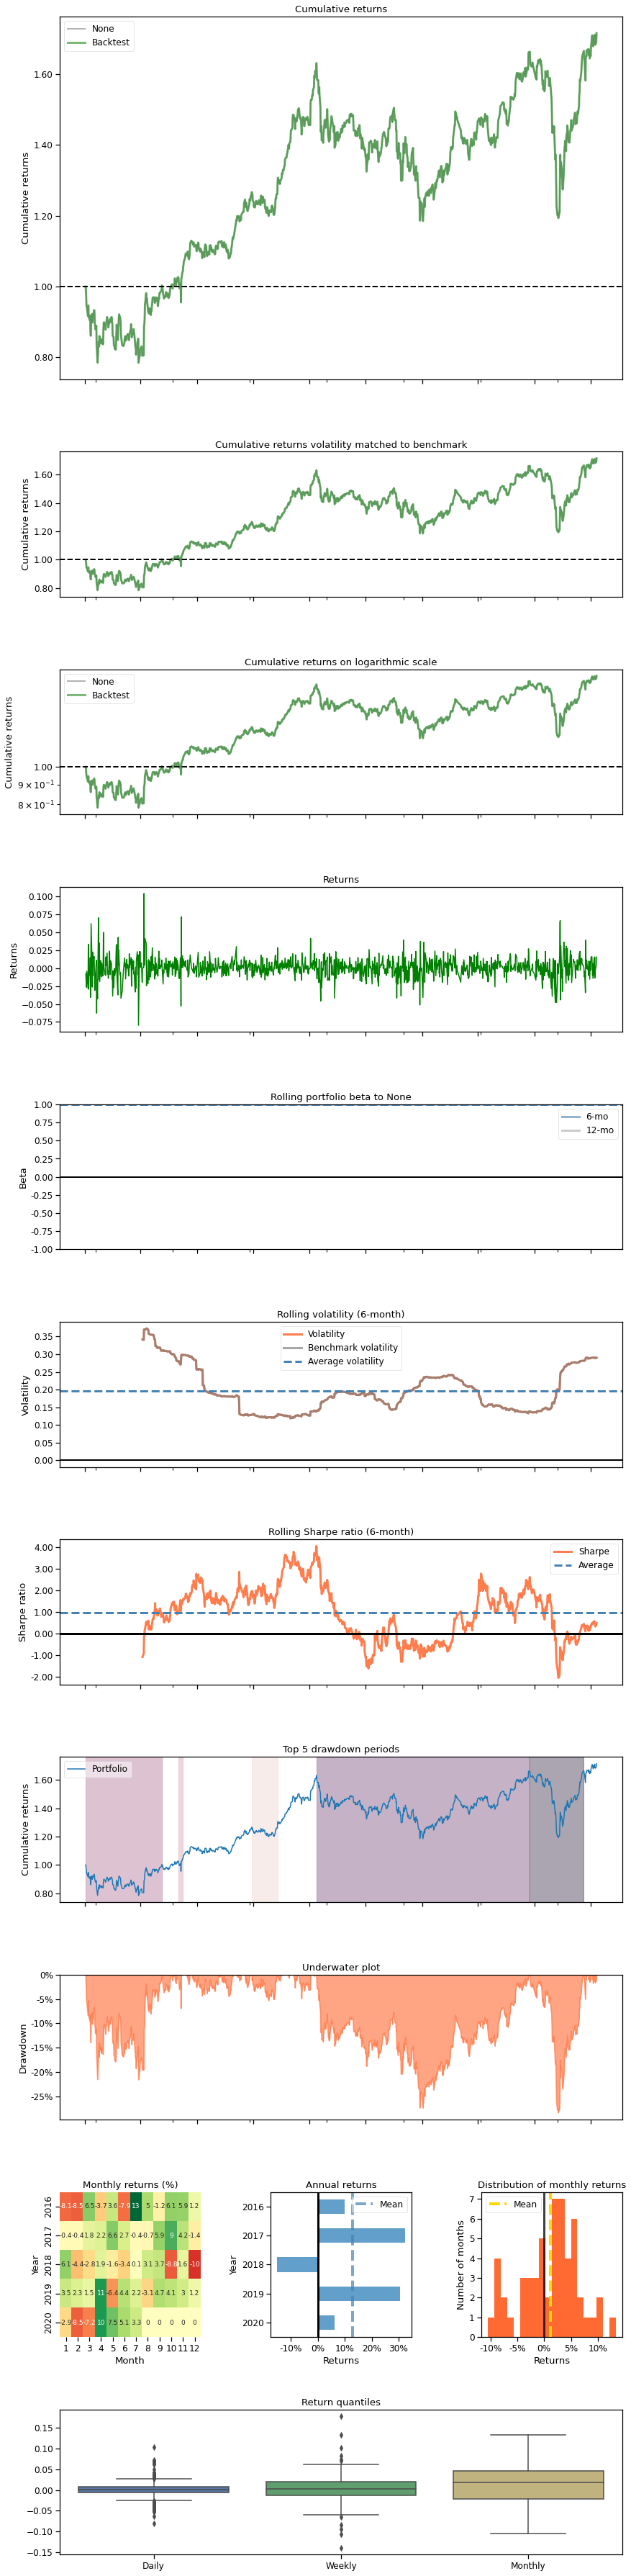

In [13]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = dow_strat, benchmark_rets = dow_strat, set_context=False)

### PPO ver1 HMAX_NORMALIZE=10 & Hold Range = 0 to 3 with int share

In [117]:
tse_ppo_ver1_1_account_value = get_account_value(63, 63, 'tse', 'ppo_HMAX_NORMALIZE10_hold0to3', 'PPO', 1)
tse_ppo_ver1_2_account_value = get_account_value(63, 63, 'tse', 'ppo_HMAX_NORMALIZE10_hold0to3', 'PPO', 2)
tse_ppo_ver1_3_account_value = get_account_value(63, 63, 'tse', 'ppo_HMAX_NORMALIZE10_hold0to3', 'PPO', 3)
tse_ppo_ver1_4_account_value = get_account_value(63, 63, 'tse', 'ppo_HMAX_NORMALIZE10_hold0to3', 'PPO', 4)
tse_ppo_ver1_5_account_value = get_account_value(63, 63, 'tse', 'ppo_HMAX_NORMALIZE10_hold0to3', 'PPO', 5)

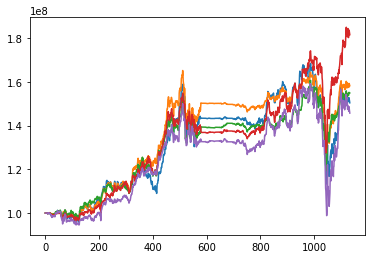

In [118]:
tse_ppo_ver1_1_account_value.account_value.plot()
tse_ppo_ver1_2_account_value.account_value.plot()
tse_ppo_ver1_3_account_value.account_value.plot()
tse_ppo_ver1_4_account_value.account_value.plot()
tse_ppo_ver1_5_account_value.account_value.plot()

In [119]:
tse_ppo_ver1_1_account_value = get_daily_return(tse_ppo_ver1_1_account_value)
tse_ppo_ver1_2_account_value = get_daily_return(tse_ppo_ver1_2_account_value)
tse_ppo_ver1_3_account_value = get_daily_return(tse_ppo_ver1_3_account_value)
tse_ppo_ver1_4_account_value = get_daily_return(tse_ppo_ver1_4_account_value)
tse_ppo_ver1_5_account_value = get_daily_return(tse_ppo_ver1_5_account_value)

In [120]:
tse_ppo_ver1_1_account_value['Date'] = test_tse['Date']
tse_ppo_ver1_2_account_value['Date'] = test_tse['Date']
tse_ppo_ver1_3_account_value['Date'] = test_tse['Date']
tse_ppo_ver1_4_account_value['Date'] = test_tse['Date']
tse_ppo_ver1_5_account_value['Date'] = test_tse['Date']

In [121]:
tse_ppo_ver1_1_strat = backtest_strat(tse_ppo_ver1_1_account_value)
tse_ppo_ver1_2_strat = backtest_strat(tse_ppo_ver1_2_account_value)
tse_ppo_ver1_3_strat = backtest_strat(tse_ppo_ver1_3_account_value)
tse_ppo_ver1_4_strat = backtest_strat(tse_ppo_ver1_4_account_value)
tse_ppo_ver1_5_strat = backtest_strat(tse_ppo_ver1_5_account_value)

/home/kongminseok/anaconda3/envs/k/lib/python3.7/site-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


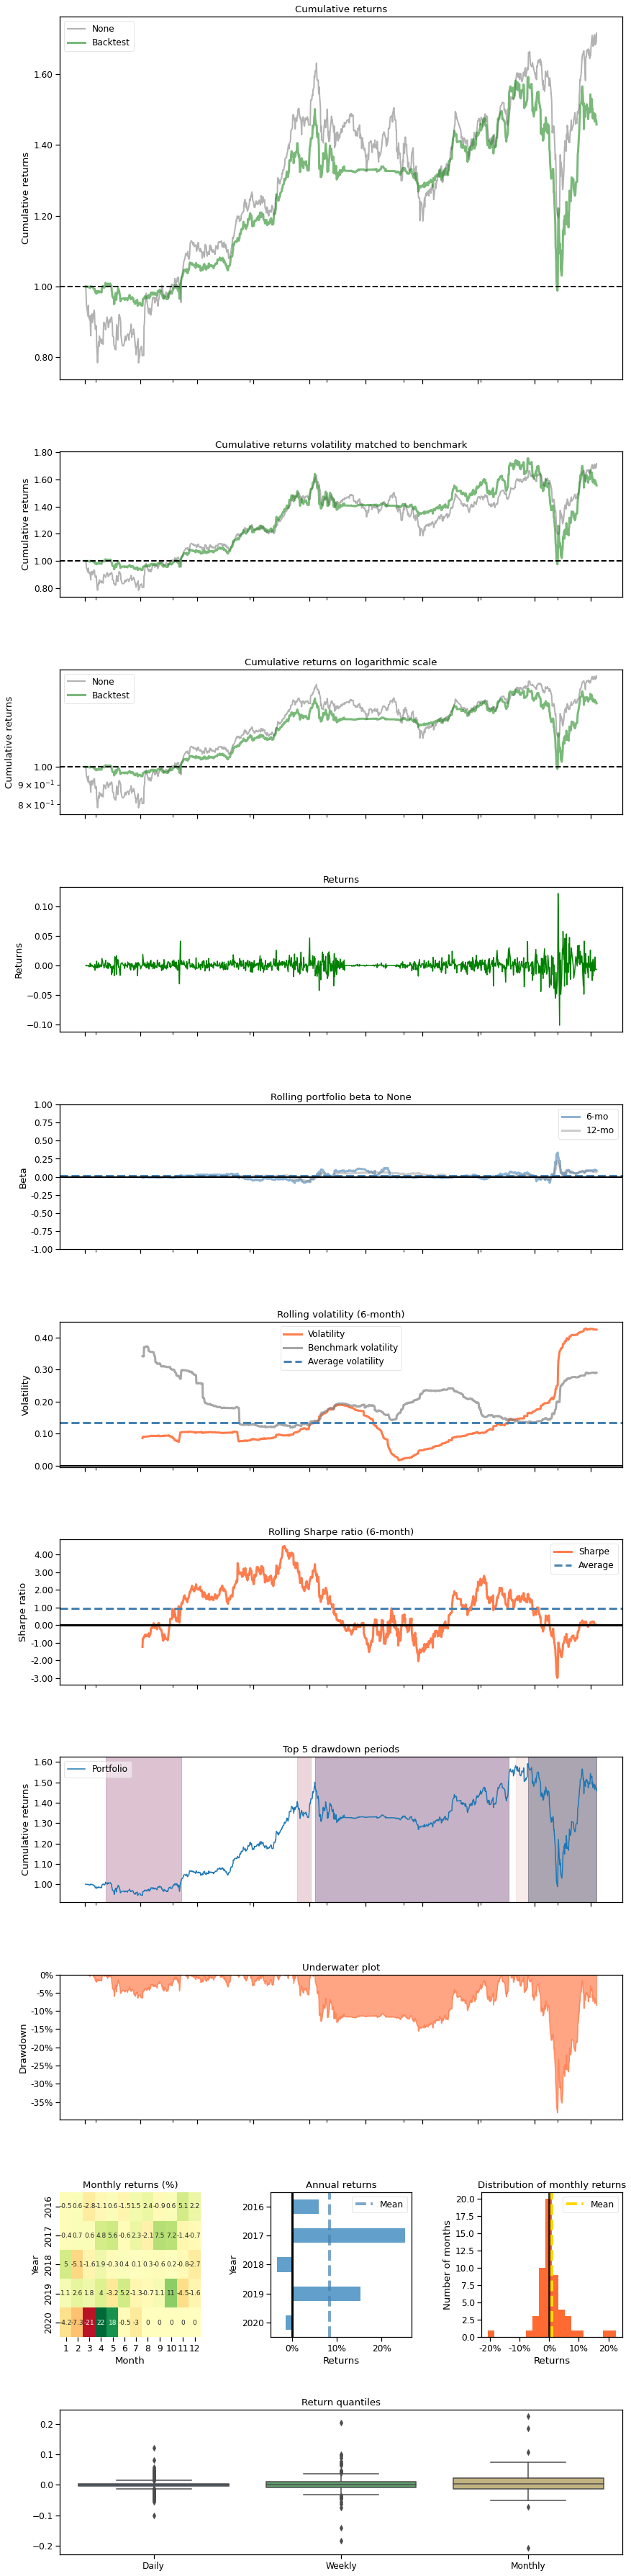

In [122]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = tse_ppo_ver1_5_strat,
                                   benchmark_rets=dow_strat, set_context=False)

In [123]:
term = '(2016/01/04-2020/07/21)'
ppo_ver1_performance_evaluation = {term:['Cumulative Return','Annual Return', 'Annual Volatility','Sharpe Ratio', 'Max Dragdown'],
                          'tse_ppo_1':['50.446%','0%','0%','0','-0%'],
                          'tes_ppo_2':['58.264%','0%','0%','0','-0%'],
                          'tse_ppo_3':['54.933%','0%','0%','0','-0%'],
                          'tse_ppo_4':['81.633%','0%','0%','0','-0%'],
                          'tse_ppo_5':['45.742%','0%','0%','0','-0%'],
                          }
ppo_ver1_performance_evaluation = pd.DataFrame(ppo_ver1_performance_evaluation).set_index(term)
ppo_ver1_performance_evaluation.to_csv('performance/tse_ppo_ver1_performance_evaluation_comparison.csv',index=True)
display(ppo_ver1_performance_evaluation)

tse_ppo_1 tes_ppo_2 tse_ppo_3 tse_ppo_4 tse_ppo_5
(2016/01/04-2020/07/21)                                                  
Cumulative Return         50.446%   58.264%   54.933%   81.633%   45.742%
Annual Return                  0%        0%        0%        0%        0%
Annual Volatility              0%        0%        0%        0%        0%
Sharpe Ratio                    0         0         0         0         0
Max Dragdown                  -0%       -0%       -0%       -0%       -0%

In [124]:
ppo_ver1_performance_evaluation_transpose = ppo_ver1_performance_evaluation.T
ppo_ver1_performance_evaluation_transpose.apply(lambda x: x.replace("%","",regex=True,inplace=True)) # 부분일치의 경우, regex=True 파라미터를 추가함으로써 해당 문자가 포함되어 있으면 문자가 대체된다.
ppo_ver1_performance_evaluation_transpose = ppo_ver1_performance_evaluation_transpose.apply(pd.to_numeric)
display(ppo_ver1_performance_evaluation_transpose)
display(ppo_ver1_performance_evaluation_transpose.dtypes)

(2016/01/04-2020/07/21)  Cumulative Return  Annual Return  Annual Volatility  \
tse_ppo_1                           50.446              0                  0   
tes_ppo_2                           58.264              0                  0   
tse_ppo_3                           54.933              0                  0   
tse_ppo_4                           81.633              0                  0   
tse_ppo_5                           45.742              0                  0   

(2016/01/04-2020/07/21)  Sharpe Ratio  Max Dragdown  
tse_ppo_1                           0             0  
tes_ppo_2                           0             0  
tse_ppo_3                           0             0  
tse_ppo_4                           0             0  
tse_ppo_5                           0             0

(2016/01/04-2020/07/21)
Cumulative Return    float64
Annual Return          int64
Annual Volatility      int64
Sharpe Ratio           int64
Max Dragdown           int64
dtype: object

In [125]:
ppo_ver1_performance_evaluation_transpose['Cumulative Return'].mean()

58.20360000000001

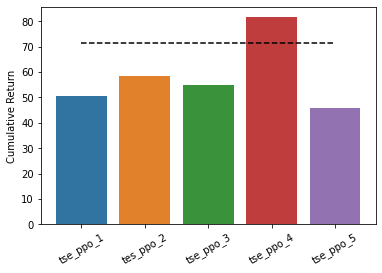

In [126]:
real_kospi = 71.51
sns.barplot(y= ppo_ver1_performance_evaluation_transpose['Cumulative Return'], x=ppo_ver1_performance_evaluation_transpose.index )
sns.lineplot(y=real_kospi,x=ppo_ver1_performance_evaluation_transpose.index,color='black',linestyle='--')
#plt.title("JPX mean of PPO ver1's each experiments culmulative return")
#plt.xlabel('Number of Experiments')
plt.ylabel('Cumulative Return')
plt.xticks(rotation=30)
plt.savefig('./performance/tse_ppo_ver1.png',dpi=500)

### DDPG ver1 HMAX_NORMALIZE=10 & Hold Range = 0 to 3 with int share

In [55]:
tse_ddpg_ver1_1_account_value = get_account_value(63, 63, 'tse', 'ddpg_HMAX_NORMALIZE10_hold0to3', 'ddpg', 1)
tse_ddpg_ver1_2_account_value = get_account_value(63, 63, 'tse', 'ddpg_HMAX_NORMALIZE10_hold0to3', 'ddpg', 2)
tse_ddpg_ver1_3_account_value = get_account_value(63, 63, 'tse', 'ddpg_HMAX_NORMALIZE10_hold0to3', 'ddpg', 3)
tse_ddpg_ver1_4_account_value = get_account_value(63, 63, 'tse', 'ddpg_HMAX_NORMALIZE10_hold0to3', 'ddpg', 4)
tse_ddpg_ver1_5_account_value = get_account_value(63, 63, 'tse', 'ddpg_HMAX_NORMALIZE10_hold0to3', 'ddpg', 5)

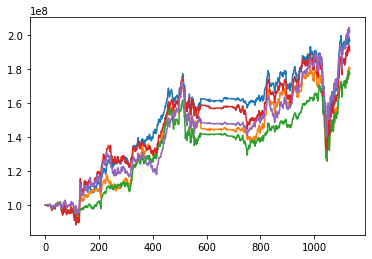

In [56]:
tse_ddpg_ver1_1_account_value.account_value.plot()
tse_ddpg_ver1_2_account_value.account_value.plot()
tse_ddpg_ver1_3_account_value.account_value.plot()
tse_ddpg_ver1_4_account_value.account_value.plot()
tse_ddpg_ver1_5_account_value.account_value.plot()

In [57]:
tse_ddpg_ver1_1_account_value = get_daily_return(tse_ddpg_ver1_1_account_value)
tse_ddpg_ver1_2_account_value = get_daily_return(tse_ddpg_ver1_2_account_value)
tse_ddpg_ver1_3_account_value = get_daily_return(tse_ddpg_ver1_3_account_value)
tse_ddpg_ver1_4_account_value = get_daily_return(tse_ddpg_ver1_4_account_value)
tse_ddpg_ver1_5_account_value = get_daily_return(tse_ddpg_ver1_5_account_value)

In [58]:
tse_ddpg_ver1_1_account_value['Date'] = test_tse['Date']
tse_ddpg_ver1_2_account_value['Date'] = test_tse['Date']
tse_ddpg_ver1_3_account_value['Date'] = test_tse['Date']
tse_ddpg_ver1_4_account_value['Date'] = test_tse['Date']
tse_ddpg_ver1_5_account_value['Date'] = test_tse['Date']

In [59]:
tse_ddpg_ver1_1_strat = backtest_strat(tse_ddpg_ver1_1_account_value)
tse_ddpg_ver1_2_strat = backtest_strat(tse_ddpg_ver1_2_account_value)
tse_ddpg_ver1_3_strat = backtest_strat(tse_ddpg_ver1_3_account_value)
tse_ddpg_ver1_4_strat = backtest_strat(tse_ddpg_ver1_4_account_value)
tse_ddpg_ver1_5_strat = backtest_strat(tse_ddpg_ver1_5_account_value)

/home/kongminseok/anaconda3/envs/k/lib/python3.7/site-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


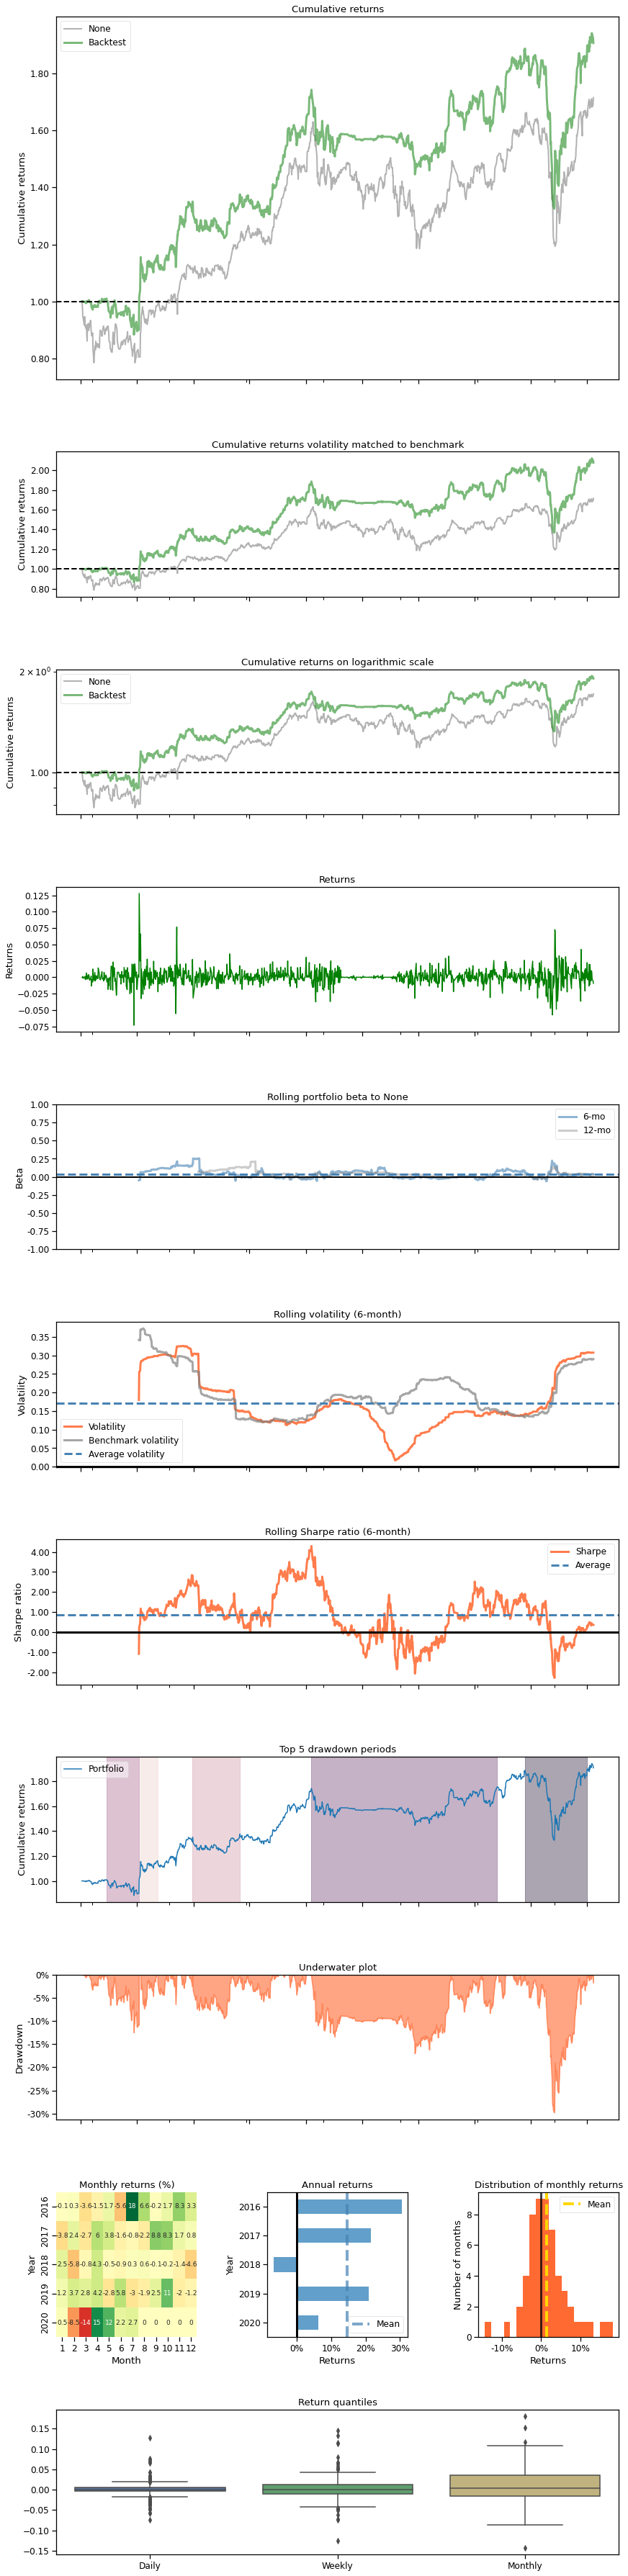

In [64]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = tse_ddpg_ver1_4_strat,
                                   benchmark_rets=dow_strat, set_context=False)

In [65]:
term = '(2016/01/04-2020/07/21)'
ddpg_ver1_performance_evaluation = {term:['Cumulative Return','Annual Return', 'Annual Volatility','Sharpe Ratio', 'Max Dragdown'],
                          'tse_ddpg_1':['96.477%','0%','0%','0','-0%'],
                          'tes_ddpg_2':['79.738%','0%','0%','0','-0%'],
                          'tse_ddpg_3':['76.879%','0%','0%','0','-0%'],
                          'tse_ddpg_4':['90.693%','0%','0%','0','-0%'],
                          'tse_ddpg_5':['101.648%','0%','0%','0','-0%'],
                          }
ddpg_ver1_performance_evaluation = pd.DataFrame(ddpg_ver1_performance_evaluation).set_index(term)
ddpg_ver1_performance_evaluation.to_csv('performance/tse_ddpg_ver1_performance_evaluation_comparison.csv',index=True)
display(ddpg_ver1_performance_evaluation)

tse_ddpg_1 tes_ddpg_2 tse_ddpg_3 tse_ddpg_4 tse_ddpg_5
(2016/01/04-2020/07/21)                                                       
Cumulative Return          96.477%    79.738%    76.879%    90.693%   101.648%
Annual Return                   0%         0%         0%         0%         0%
Annual Volatility               0%         0%         0%         0%         0%
Sharpe Ratio                     0          0          0          0          0
Max Dragdown                   -0%        -0%        -0%        -0%        -0%

In [66]:
ddpg_ver1_performance_evaluation_transpose = ddpg_ver1_performance_evaluation.T
ddpg_ver1_performance_evaluation_transpose.apply(lambda x: x.replace("%","",regex=True,inplace=True)) # 부분일치의 경우, regex=True 파라미터를 추가함으로써 해당 문자가 포함되어 있으면 문자가 대체된다.
ddpg_ver1_performance_evaluation_transpose = ddpg_ver1_performance_evaluation_transpose.apply(pd.to_numeric)
display(ddpg_ver1_performance_evaluation_transpose)
display(ddpg_ver1_performance_evaluation_transpose.dtypes)

(2016/01/04-2020/07/21)  Cumulative Return  Annual Return  Annual Volatility  \
tse_ddpg_1                          96.477              0                  0   
tes_ddpg_2                          79.738              0                  0   
tse_ddpg_3                          76.879              0                  0   
tse_ddpg_4                          90.693              0                  0   
tse_ddpg_5                         101.648              0                  0   

(2016/01/04-2020/07/21)  Sharpe Ratio  Max Dragdown  
tse_ddpg_1                          0             0  
tes_ddpg_2                          0             0  
tse_ddpg_3                          0             0  
tse_ddpg_4                          0             0  
tse_ddpg_5                          0             0

(2016/01/04-2020/07/21)
Cumulative Return    float64
Annual Return          int64
Annual Volatility      int64
Sharpe Ratio           int64
Max Dragdown           int64
dtype: object

In [67]:
ddpg_ver1_performance_evaluation_transpose['Cumulative Return'].mean()

89.08699999999999

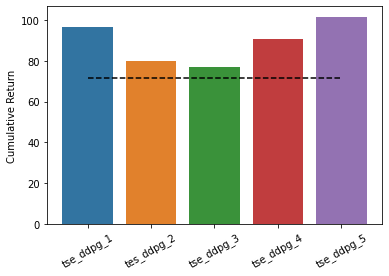

In [69]:
real_kospi = 71.51
sns.barplot(y= ddpg_ver1_performance_evaluation_transpose['Cumulative Return'], x=ddpg_ver1_performance_evaluation_transpose.index )
sns.lineplot(y=real_kospi,x=ddpg_ver1_performance_evaluation_transpose.index,color='black',linestyle='--')
#plt.title("JPX mean of DDPG ver1's each experiments culmulative return")
#plt.xlabel('Number of Experiments')
plt.ylabel('Cumulative Return')
plt.xticks(rotation=30)
plt.savefig('./performance/tse_ddpg_ver1.png',dpi=500)

### A2C ver1 HMAX_NORMALIZE=10 & Hold Range = 0 to 3 with int share

In [49]:
tse_a2c_ver1_1_account_value = get_account_value(63, 63, 'tse', 'a2c_HMAX_NORMALIZE10_hold0to3', 'A2C', 1)
tse_a2c_ver1_2_account_value = get_account_value(63, 63, 'tse', 'a2c_HMAX_NORMALIZE10_hold0to3', 'A2C', 2)
tse_a2c_ver1_3_account_value = get_account_value(63, 63, 'tse', 'a2c_HMAX_NORMALIZE10_hold0to3', 'A2C', 3)
tse_a2c_ver1_4_account_value = get_account_value(63, 63, 'tse', 'a2c_HMAX_NORMALIZE10_hold0to3', 'A2C', 4)
tse_a2c_ver1_5_account_value = get_account_value(63, 63, 'tse', 'a2c_HMAX_NORMALIZE10_hold0to3', 'A2C', 5)

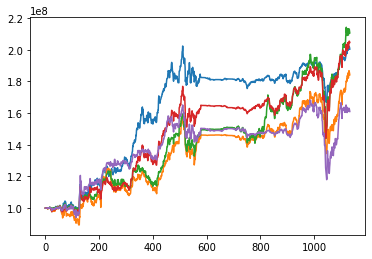

In [50]:
tse_a2c_ver1_1_account_value.account_value.plot()
tse_a2c_ver1_2_account_value.account_value.plot()
tse_a2c_ver1_3_account_value.account_value.plot()
tse_a2c_ver1_4_account_value.account_value.plot()
tse_a2c_ver1_5_account_value.account_value.plot()

In [51]:
tse_a2c_ver1_1_account_value = get_daily_return(tse_a2c_ver1_1_account_value)
tse_a2c_ver1_2_account_value = get_daily_return(tse_a2c_ver1_2_account_value)
tse_a2c_ver1_3_account_value = get_daily_return(tse_a2c_ver1_3_account_value)
tse_a2c_ver1_4_account_value = get_daily_return(tse_a2c_ver1_4_account_value)
tse_a2c_ver1_5_account_value = get_daily_return(tse_a2c_ver1_5_account_value)

In [52]:
tse_a2c_ver1_1_account_value['Date'] = test_tse['Date']
tse_a2c_ver1_2_account_value['Date'] = test_tse['Date']
tse_a2c_ver1_3_account_value['Date'] = test_tse['Date']
tse_a2c_ver1_4_account_value['Date'] = test_tse['Date']
tse_a2c_ver1_5_account_value['Date'] = test_tse['Date']

In [53]:
tse_a2c_ver1_1_strat = backtest_strat(tse_a2c_ver1_1_account_value)
tse_a2c_ver1_2_strat = backtest_strat(tse_a2c_ver1_2_account_value)
tse_a2c_ver1_3_strat = backtest_strat(tse_a2c_ver1_3_account_value)
tse_a2c_ver1_4_strat = backtest_strat(tse_a2c_ver1_4_account_value)
tse_a2c_ver1_5_strat = backtest_strat(tse_a2c_ver1_5_account_value)

/home/kongminseok/anaconda3/envs/k/lib/python3.7/site-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


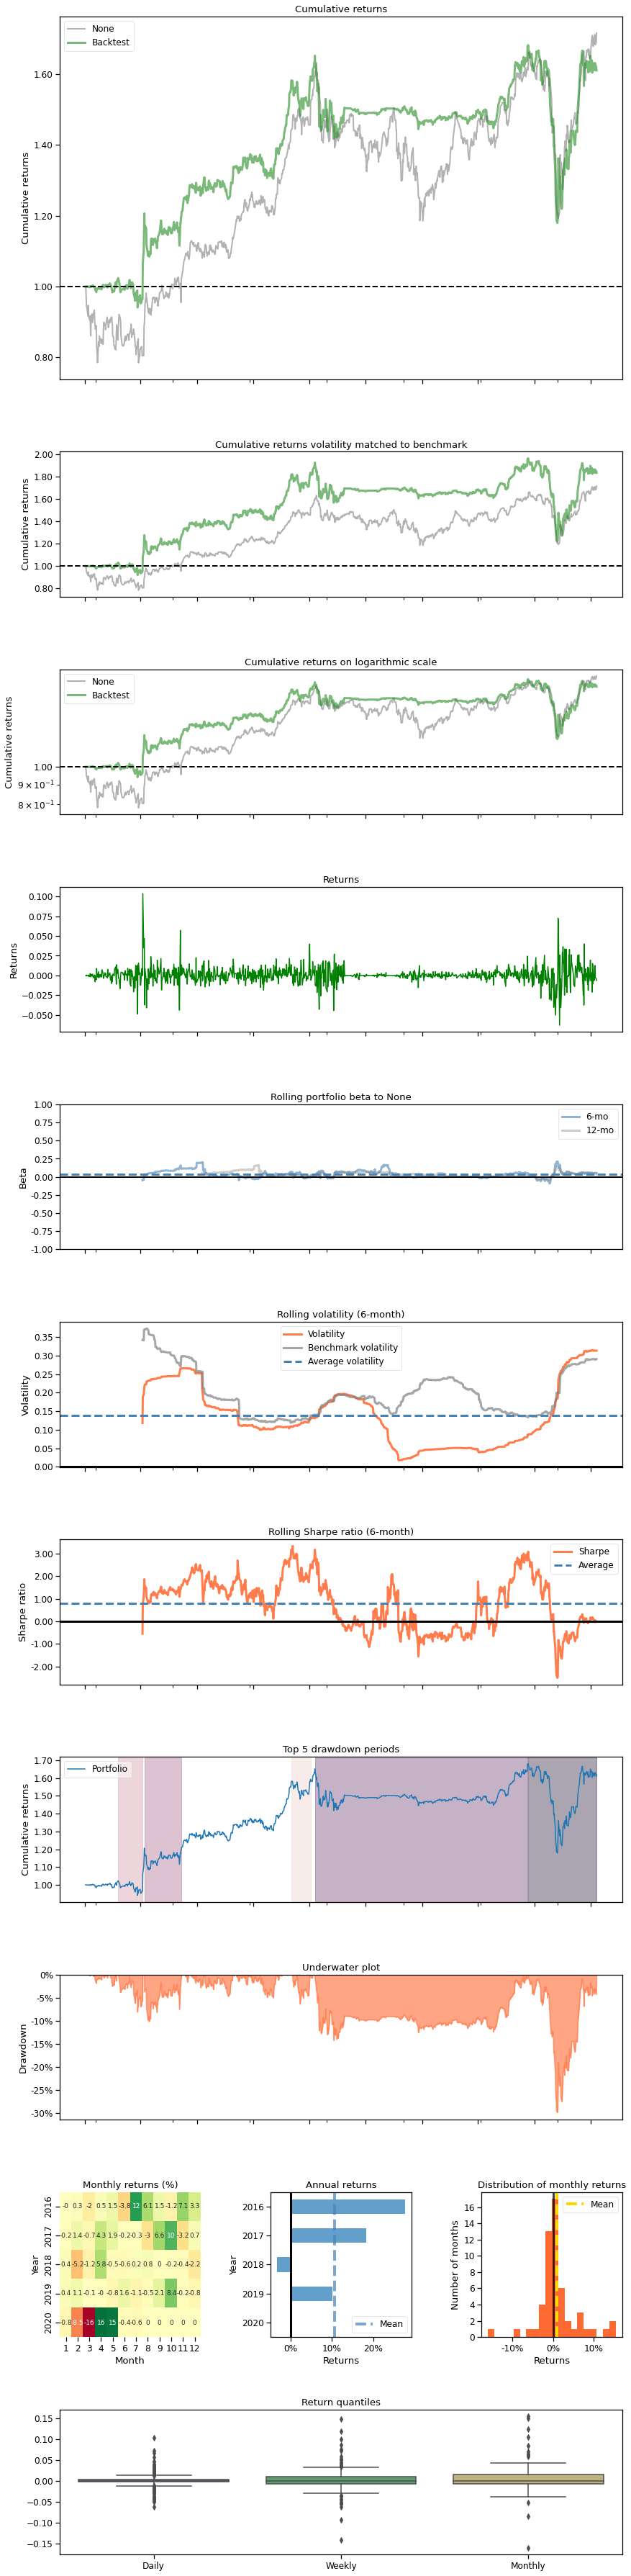

In [54]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = tse_a2c_ver1_5_strat,
                                   benchmark_rets=dow_strat, set_context=False)

In [55]:
term = '(2016/01/04-2020/07/21)'
a2c_ver1_performance_evaluation = {term:['Cumulative Return','Annual Return', 'Annual Volatility','Sharpe Ratio', 'Max Dragdown'],
                          'a2c_ddpg_1':['100.422%','0%','0%','0','-0%'],
                          'a2c_ddpg_2':['84.178%','0%','0%','0','-0%'],
                          'a2c_ddpg_3':['110.631%','0%','0%','0','-0%'],
                          'a2c_ddpg_4':['104.585%','0%','0%','0','-0%'],
                          'a2c_ddpg_5':['61.004%','0%','0%','0','-0%'],
                          }
a2c_ver1_performance_evaluation = pd.DataFrame(a2c_ver1_performance_evaluation).set_index(term)
a2c_ver1_performance_evaluation.to_csv('performance/tse_a2c_ver1_performance_evaluation_comparison.csv',index=True)
display(a2c_ver1_performance_evaluation)

a2c_ddpg_1 a2c_ddpg_2 a2c_ddpg_3 a2c_ddpg_4 a2c_ddpg_5
(2016/01/04-2020/07/21)                                                       
Cumulative Return         100.422%    84.178%   110.631%   104.585%    61.004%
Annual Return                   0%         0%         0%         0%         0%
Annual Volatility               0%         0%         0%         0%         0%
Sharpe Ratio                     0          0          0          0          0
Max Dragdown                   -0%        -0%        -0%        -0%        -0%

In [56]:
a2c_ver1_performance_evaluation_transpose = a2c_ver1_performance_evaluation.T
a2c_ver1_performance_evaluation_transpose.apply(lambda x: x.replace("%","",regex=True,inplace=True)) # 부분일치의 경우, regex=True 파라미터를 추가함으로써 해당 문자가 포함되어 있으면 문자가 대체된다.
a2c_ver1_performance_evaluation_transpose = a2c_ver1_performance_evaluation_transpose.apply(pd.to_numeric)
display(a2c_ver1_performance_evaluation_transpose)
display(a2c_ver1_performance_evaluation_transpose.dtypes)

(2016/01/04-2020/07/21)  Cumulative Return  Annual Return  Annual Volatility  \
a2c_ddpg_1                         100.422              0                  0   
a2c_ddpg_2                          84.178              0                  0   
a2c_ddpg_3                         110.631              0                  0   
a2c_ddpg_4                         104.585              0                  0   
a2c_ddpg_5                          61.004              0                  0   

(2016/01/04-2020/07/21)  Sharpe Ratio  Max Dragdown  
a2c_ddpg_1                          0             0  
a2c_ddpg_2                          0             0  
a2c_ddpg_3                          0             0  
a2c_ddpg_4                          0             0  
a2c_ddpg_5                          0             0

(2016/01/04-2020/07/21)
Cumulative Return    float64
Annual Return          int64
Annual Volatility      int64
Sharpe Ratio           int64
Max Dragdown           int64
dtype: object

In [57]:
a2c_ver1_performance_evaluation_transpose['Cumulative Return'].mean()

92.164

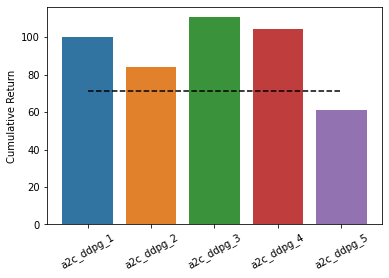

In [58]:
real_kospi = 71.51
sns.barplot(y=a2c_ver1_performance_evaluation_transpose['Cumulative Return'], x=a2c_ver1_performance_evaluation_transpose.index )
sns.lineplot(y=real_kospi,x=a2c_ver1_performance_evaluation_transpose.index,color='black',linestyle='--')
#plt.title("JPX mean of DDPG ver1's each experiments culmulative return")
#plt.xlabel('Number of Experiments')
plt.ylabel('Cumulative Return')
plt.xticks(rotation=30)
plt.savefig('./performance/tse_a2c_ver1.png',dpi=500)

### Ensemble ver1 HMAX_NORMALIZE=10 & Hold Range = 0 to 3 with int share

In [96]:
tse_ensemble_ver1_1_account_value = get_account_value(63, 63, 'tse', 'ensemble_HMAX_NORMALIZE10_hold0to3', 'ensemble', 1)
tse_ensemble_ver1_2_account_value = get_account_value(63, 63, 'tse', 'ensemble_HMAX_NORMALIZE10_hold0to3', 'ensemble', 2)
tse_ensemble_ver1_3_account_value = get_account_value(63, 63, 'tse', 'ensemble_HMAX_NORMALIZE10_hold0to3', 'ensemble', 3)
tse_ensemble_ver1_4_account_value = get_account_value(63, 63, 'tse', 'ensemble_HMAX_NORMALIZE10_hold0to3', 'ensemble', 4)
tse_ensemble_ver1_5_account_value = get_account_value(63, 63, 'tse', 'ensemble_HMAX_NORMALIZE10_hold0to3', 'ensemble', 5)

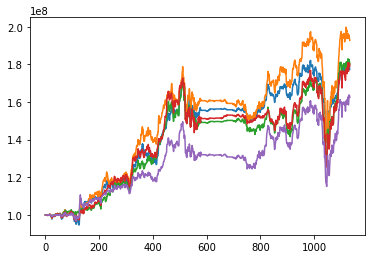

In [97]:
tse_ensemble_ver1_1_account_value.account_value.plot()
tse_ensemble_ver1_2_account_value.account_value.plot()
tse_ensemble_ver1_3_account_value.account_value.plot()
tse_ensemble_ver1_4_account_value.account_value.plot()
tse_ensemble_ver1_5_account_value.account_value.plot()

In [100]:
tse_ensemble_ver1_1_account_value = get_daily_return(tse_ensemble_ver1_1_account_value)
tse_ensemble_ver1_2_account_value = get_daily_return(tse_ensemble_ver1_2_account_value)
tse_ensemble_ver1_3_account_value = get_daily_return(tse_ensemble_ver1_3_account_value)
tse_ensemble_ver1_4_account_value = get_daily_return(tse_ensemble_ver1_4_account_value)
tse_ensemble_ver1_5_account_value = get_daily_return(tse_ensemble_ver1_5_account_value)

In [101]:
tse_ensemble_ver1_1_account_value['Date'] = test_tse['Date']
tse_ensemble_ver1_2_account_value['Date'] = test_tse['Date']
tse_ensemble_ver1_3_account_value['Date'] = test_tse['Date']
tse_ensemble_ver1_4_account_value['Date'] = test_tse['Date']
tse_ensemble_ver1_5_account_value['Date'] = test_tse['Date']

In [102]:
tse_ensemble_ver1_1_strat = backtest_strat(tse_ensemble_ver1_1_account_value)
tse_ensemble_ver1_2_strat = backtest_strat(tse_ensemble_ver1_2_account_value)
tse_ensemble_ver1_3_strat = backtest_strat(tse_ensemble_ver1_3_account_value)
tse_ensemble_ver1_4_strat = backtest_strat(tse_ensemble_ver1_4_account_value)
tse_ensemble_ver1_5_strat = backtest_strat(tse_ensemble_ver1_4_account_value)

/home/kongminseok/anaconda3/envs/k/lib/python3.7/site-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


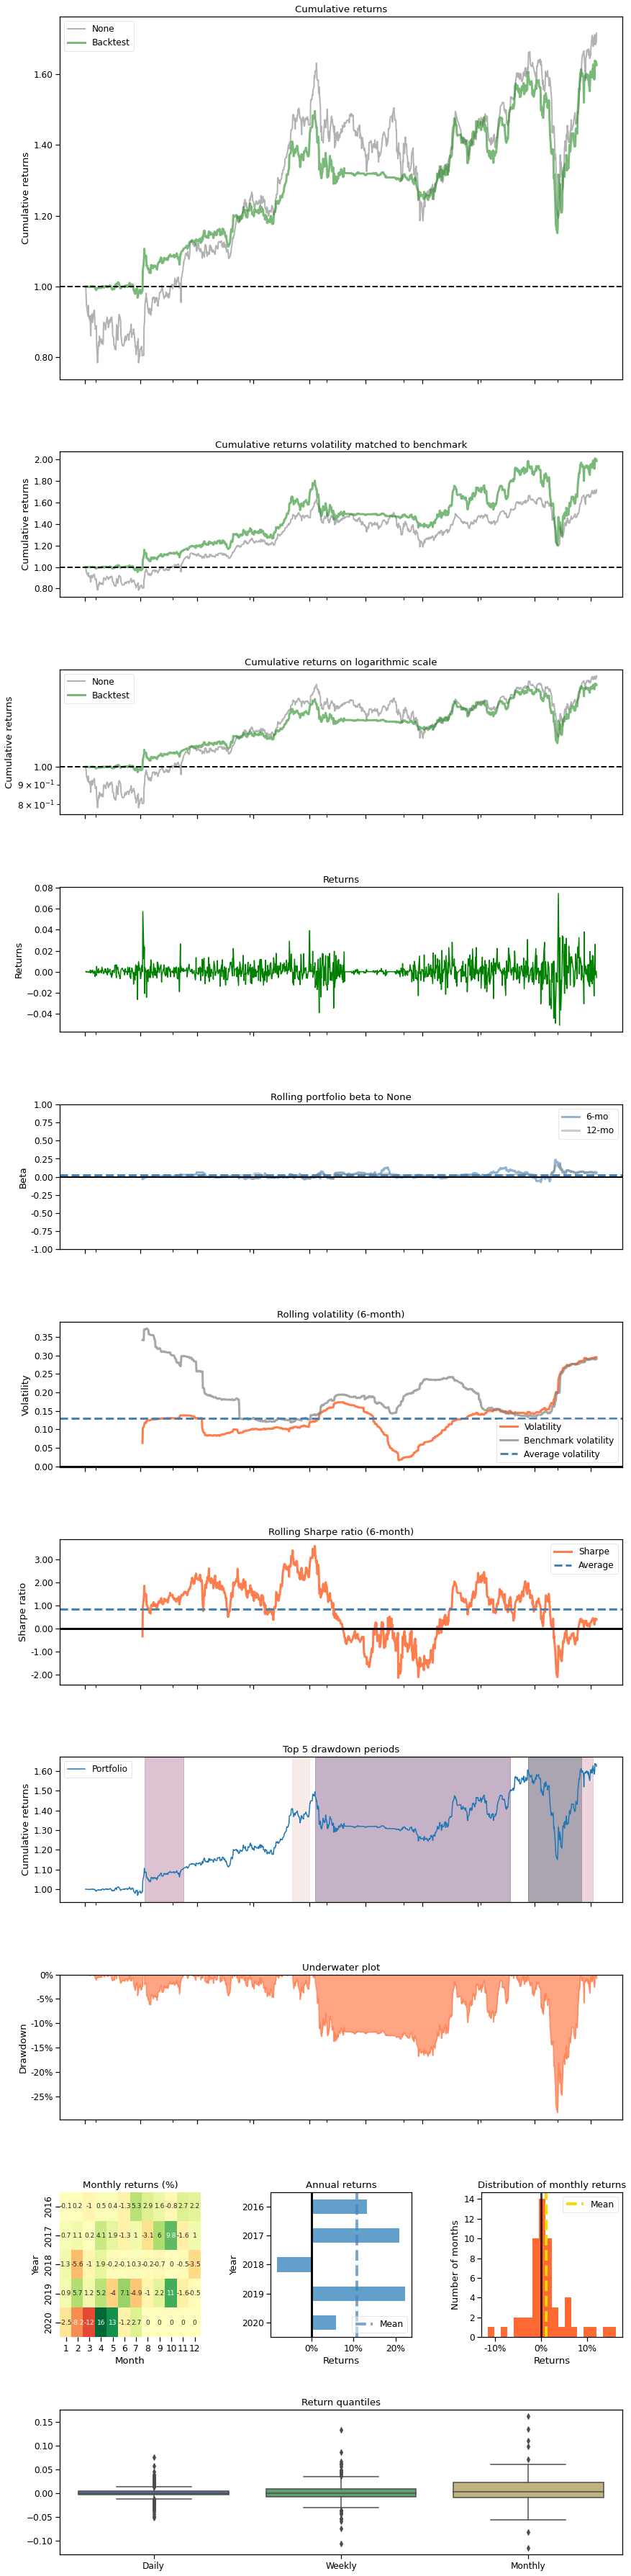

In [103]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = tse_ensemble_ver1_5_strat,
                                   benchmark_rets=dow_strat, set_context=False)

In [160]:
term = '(2016/01/04-2020/07/21)'
ensemble_ver1_performance_evaluation = {term:['Cumulative Return','Annual Return', 'Annual Volatility','Sharpe Ratio', 'Max Dragdown'],
                          'tse_ensemble_1':['77.599%','0%','0%','0','-0%'],
                          'tes_ensemble_2':['92.764%','0%','0%','0','-0%'],
                          'tse_ensemble_3':['80.087%','0%','0%','0','-0%'],
                          'tse_ensemble_4':['79.084%','0%','0%','0','-0%'],
                          'tse_ensemble_5':['62.45%','0%','0%','0','-0%'],
                          }
ensemble_ver1_performance_evaluation = pd.DataFrame(ensemble_ver1_performance_evaluation).set_index(term)
ensemble_ver1_performance_evaluation.to_csv('performance/tse_ensemble_ver1_performance_evaluation_comparison.csv',index=True)
display(ensemble_ver1_performance_evaluation)

tse_ensemble_1 tes_ensemble_2 tse_ensemble_3  \
(2016/01/04-2020/07/21)                                                
Cumulative Return              77.599%        92.764%        80.087%   
Annual Return                       0%             0%             0%   
Annual Volatility                   0%             0%             0%   
Sharpe Ratio                         0              0              0   
Max Dragdown                       -0%            -0%            -0%   

                        tse_ensemble_4 tse_ensemble_5  
(2016/01/04-2020/07/21)                                
Cumulative Return              79.084%         62.45%  
Annual Return                       0%             0%  
Annual Volatility                   0%             0%  
Sharpe Ratio                         0              0  
Max Dragdown                       -0%            -0%

In [105]:
ensemble_ver1_performance_evaluation_transpose = ensemble_ver1_performance_evaluation.T
ensemble_ver1_performance_evaluation_transpose.apply(lambda x: x.replace("%","",regex=True,inplace=True)) # 부분일치의 경우, regex=True 파라미터를 추가함으로써 해당 문자가 포함되어 있으면 문자가 대체된다.
ensemble_ver1_performance_evaluation_transpose = ensemble_ver1_performance_evaluation_transpose.apply(pd.to_numeric)
display(ensemble_ver1_performance_evaluation_transpose)
display(ensemble_ver1_performance_evaluation_transpose.dtypes)

(2016/01/04-2020/07/21)  Cumulative Return  Annual Return  Annual Volatility  \
tse_ensemble_1                      77.599              0                  0   
tes_ensemble_2                      92.764              0                  0   
tse_ensemble_3                      80.087              0                  0   
tse_ensemble_4                      79.084              0                  0   
tse_ensemble_5                      62.450              0                  0   

(2016/01/04-2020/07/21)  Sharpe Ratio  Max Dragdown  
tse_ensemble_1                      0             0  
tes_ensemble_2                      0             0  
tse_ensemble_3                      0             0  
tse_ensemble_4                      0             0  
tse_ensemble_5                      0             0

(2016/01/04-2020/07/21)
Cumulative Return    float64
Annual Return          int64
Annual Volatility      int64
Sharpe Ratio           int64
Max Dragdown           int64
dtype: object

In [106]:
ensemble_ver1_performance_evaluation_transpose['Cumulative Return'].mean()

78.3968

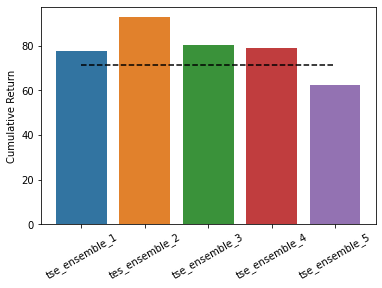

In [107]:
real_kospi = 71.51
sns.barplot(y= ensemble_ver1_performance_evaluation_transpose['Cumulative Return'], x=ensemble_ver1_performance_evaluation_transpose.index )
sns.lineplot(y=real_kospi,x=ensemble_ver1_performance_evaluation_transpose.index,color='black',linestyle='--')
#plt.title("JPX mean of Ensemble ver1's each experiments culmulative return")
#plt.xlabel('Number of Experiments')
plt.ylabel('Cumulative Return')
plt.xticks(rotation=30)
plt.savefig('./performance/tse_ensemble_ver1.png',dpi=500)

### Remake ver1 HMAX_NORMALIZE=10 & Hold Range = 0 to 3 with int share

In [148]:
tse_remake_ver1_1_account_value = get_account_value(63, 63, 'tse', 'remake_HMAX_NORMALIZE10_hold0to3', 'remake_ensemble', 1)
tse_remake_ver1_2_account_value = get_account_value(63, 63, 'tse', 'remake_HMAX_NORMALIZE10_hold0to3', 'remake_ensemble', 2)
tse_remake_ver1_3_account_value = get_account_value(63, 63, 'tse', 'remake_HMAX_NORMALIZE10_hold0to3', 'remake_ensemble', 3)
tse_remake_ver1_4_account_value = get_account_value(63, 63, 'tse', 'remake_HMAX_NORMALIZE10_hold0to3', 'remake_ensemble', 4)
tse_remake_ver1_5_account_value = get_account_value(63, 63, 'tse', 'remake_HMAX_NORMALIZE10_hold0to3', 'remake_ensemble', 5)

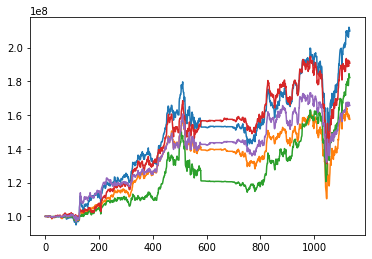

In [149]:
tse_remake_ver1_1_account_value.account_value.plot()
tse_remake_ver1_2_account_value.account_value.plot()
tse_remake_ver1_3_account_value.account_value.plot()
tse_remake_ver1_4_account_value.account_value.plot()
tse_remake_ver1_5_account_value.account_value.plot()

In [150]:
tse_remake_ver1_1_account_value = get_daily_return(tse_remake_ver1_1_account_value)
tse_remake_ver1_2_account_value = get_daily_return(tse_remake_ver1_2_account_value)
tse_remake_ver1_3_account_value = get_daily_return(tse_remake_ver1_3_account_value)
tse_remake_ver1_4_account_value = get_daily_return(tse_remake_ver1_4_account_value)
tse_remake_ver1_5_account_value = get_daily_return(tse_remake_ver1_5_account_value)

In [151]:
tse_remake_ver1_1_account_value['Date'] = test_tse['Date']
tse_remake_ver1_2_account_value['Date'] = test_tse['Date']
tse_remake_ver1_3_account_value['Date'] = test_tse['Date']
tse_remake_ver1_4_account_value['Date'] = test_tse['Date']
tse_remake_ver1_5_account_value['Date'] = test_tse['Date']

In [152]:
tse_remake_ver1_1_strat = backtest_strat(tse_remake_ver1_1_account_value)
tse_remake_ver1_2_strat = backtest_strat(tse_remake_ver1_2_account_value)
tse_remake_ver1_3_strat = backtest_strat(tse_remake_ver1_3_account_value)
tse_remake_ver1_4_strat = backtest_strat(tse_remake_ver1_4_account_value)
tse_remake_ver1_5_strat = backtest_strat(tse_remake_ver1_5_account_value)

/home/kongminseok/anaconda3/envs/k/lib/python3.7/site-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


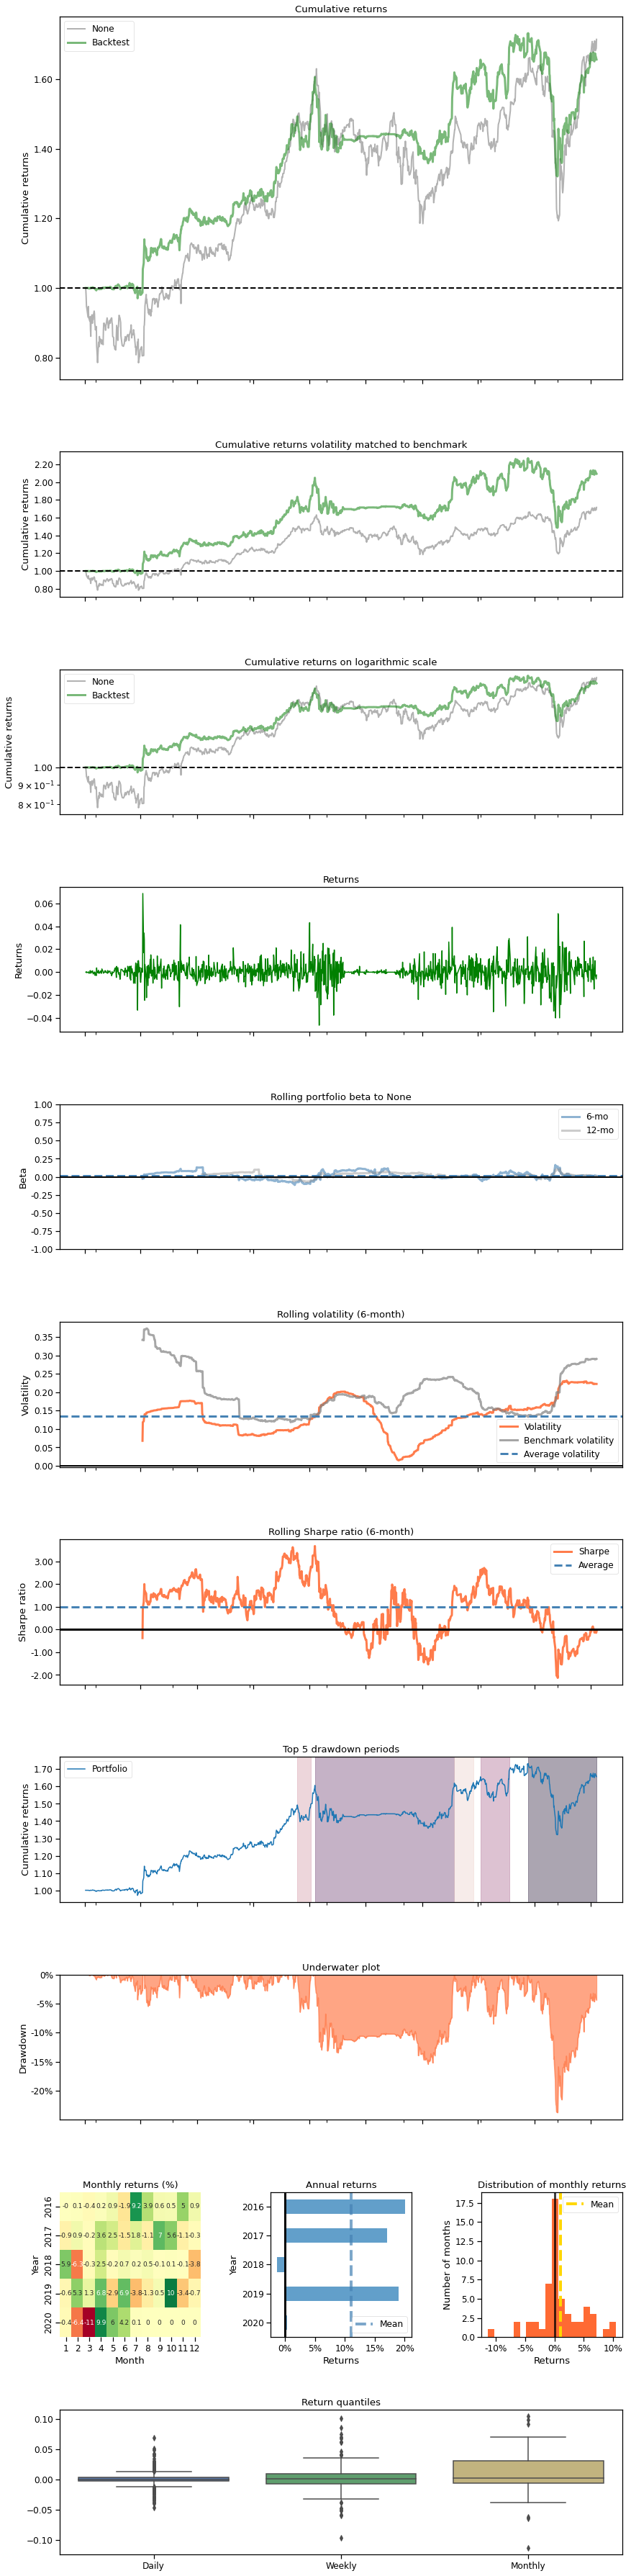

In [156]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = tse_remake_ver1_5_strat,
                                   benchmark_rets=dow_strat, set_context=False)

In [161]:
term = '(2016/01/04-2020/07/21)'
remake_ver1_performance_evaluation = {term:['Cumulative Return','Annual Return', 'Annual Volatility','Sharpe Ratio', 'Max Dragdown'],
                          'tse_remake_1':['109.832%','0%','0%','0','-0%'],
                          'tes_remake_2':['57.523%','0%','0%','0','-0%'],
                          'tse_remake_3':['82.248%','0%','0%','0','-0%'],
                          'tse_remake_4':['90.764%','0%','0%','0','-0%'],
                          'tse_remake_5':['65.715%','0%','0%','0','-0%'],
                          }
remake_ver1_performance_evaluation = pd.DataFrame(remake_ver1_performance_evaluation).set_index(term)
remake_ver1_performance_evaluation.to_csv('performance/tse_remake_ver1_performance_evaluation_comparison.csv',index=True)
display(remake_ver1_performance_evaluation)

tse_remake_1 tes_remake_2 tse_remake_3 tse_remake_4  \
(2016/01/04-2020/07/21)                                                       
Cumulative Return           109.832%      57.523%      82.248%      90.764%   
Annual Return                     0%           0%           0%           0%   
Annual Volatility                 0%           0%           0%           0%   
Sharpe Ratio                       0            0            0            0   
Max Dragdown                     -0%          -0%          -0%          -0%   

                        tse_remake_5  
(2016/01/04-2020/07/21)               
Cumulative Return            65.715%  
Annual Return                     0%  
Annual Volatility                 0%  
Sharpe Ratio                       0  
Max Dragdown                     -0%

In [162]:
remake_ver1_performance_evaluation_transpose = remake_ver1_performance_evaluation.T
remake_ver1_performance_evaluation_transpose.apply(lambda x: x.replace("%","",regex=True,inplace=True)) # 부분일치의 경우, regex=True 파라미터를 추가함으로써 해당 문자가 포함되어 있으면 문자가 대체된다.
remake_ver1_performance_evaluation_transpose = remake_ver1_performance_evaluation_transpose.apply(pd.to_numeric)
display(remake_ver1_performance_evaluation_transpose)
display(remake_ver1_performance_evaluation_transpose.dtypes)

(2016/01/04-2020/07/21)  Cumulative Return  Annual Return  Annual Volatility  \
tse_remake_1                       109.832              0                  0   
tes_remake_2                        57.523              0                  0   
tse_remake_3                        82.248              0                  0   
tse_remake_4                        90.764              0                  0   
tse_remake_5                        65.715              0                  0   

(2016/01/04-2020/07/21)  Sharpe Ratio  Max Dragdown  
tse_remake_1                        0             0  
tes_remake_2                        0             0  
tse_remake_3                        0             0  
tse_remake_4                        0             0  
tse_remake_5                        0             0

(2016/01/04-2020/07/21)
Cumulative Return    float64
Annual Return          int64
Annual Volatility      int64
Sharpe Ratio           int64
Max Dragdown           int64
dtype: object

In [163]:
remake_ver1_performance_evaluation_transpose['Cumulative Return'].mean()

81.2164

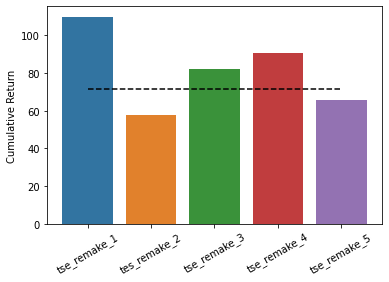

In [164]:
real_kospi = 71.51
sns.barplot(y=remake_ver1_performance_evaluation_transpose['Cumulative Return'], x=remake_ver1_performance_evaluation_transpose.index )
sns.lineplot(y=real_kospi,x=remake_ver1_performance_evaluation_transpose.index,color='black',linestyle='--')
#plt.title("JPX mean of Ensemble ver1's each experiments culmulative return")
#plt.xlabel('Number of Experiments')
plt.ylabel('Cumulative Return')
plt.xticks(rotation=30)
plt.savefig('./performance/tse_remake_ver1.png',dpi=500)

## Ensemble

In [14]:
tse_ensemble_1_account_value = get_account_value(63, 63, 'tse', 'ensemble', 'ensemble', 1)
tse_ensemble_2_account_value = get_account_value(63, 63, 'tse', 'ensemble', 'ensemble', 2)
tse_ensemble_3_account_value = get_account_value(63, 63, 'tse', 'ensemble', 'ensemble', 3)
tse_ensemble_4_account_value = get_account_value(63, 63, 'tse', 'ensemble', 'ensemble', 4)
tse_ensemble_5_account_value = get_account_value(63, 63, 'tse', 'ensemble', 'ensemble', 5)
display(tse_ensemble_1_account_value)

account_value  datadate
0      1.000000e+08  20160104
1      9.994985e+07  20160105
2      9.934707e+07  20160106
3      1.001618e+08  20160107
4      9.931136e+07  20160108
...             ...       ...
1129   2.181207e+08  20200715
1130   2.210228e+08  20200716
1131   2.199235e+08  20200717
1132   2.183774e+08  20200720
1133   2.182210e+08  20200721

[1134 rows x 2 columns]

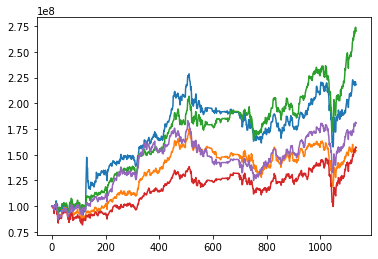

In [15]:
tse_ensemble_1_account_value.account_value.plot()
tse_ensemble_2_account_value.account_value.plot()
tse_ensemble_3_account_value.account_value.plot()
tse_ensemble_4_account_value.account_value.plot()
tse_ensemble_5_account_value.account_value.plot()

In [16]:
tse_ensemble_1_account_value = get_daily_return(tse_ensemble_1_account_value)
tse_ensemble_2_account_value = get_daily_return(tse_ensemble_2_account_value)
tse_ensemble_3_account_value = get_daily_return(tse_ensemble_3_account_value)
tse_ensemble_4_account_value = get_daily_return(tse_ensemble_4_account_value)
tse_ensemble_5_account_value = get_daily_return(tse_ensemble_5_account_value)

In [17]:
tse_ensemble_1_account_value['Date'] = test_tse['Date']
tse_ensemble_2_account_value['Date'] = test_tse['Date']
tse_ensemble_3_account_value['Date'] = test_tse['Date']
tse_ensemble_4_account_value['Date'] = test_tse['Date']
tse_ensemble_5_account_value['Date'] = test_tse['Date']
#display(tse_ensemble_1_account_value)

In [18]:
tse_ensemble_1_strat = backtest_strat(tse_ensemble_1_account_value)
tse_ensemble_2_strat = backtest_strat(tse_ensemble_2_account_value)
tse_ensemble_3_strat = backtest_strat(tse_ensemble_3_account_value)
tse_ensemble_4_strat = backtest_strat(tse_ensemble_4_account_value)
tse_ensemble_5_strat = backtest_strat(tse_ensemble_5_account_value)
#display(pd.DataFrame(tse_ensemble_1_strat))

/home/kongminseok/anaconda3/envs/k/lib/python3.7/site-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


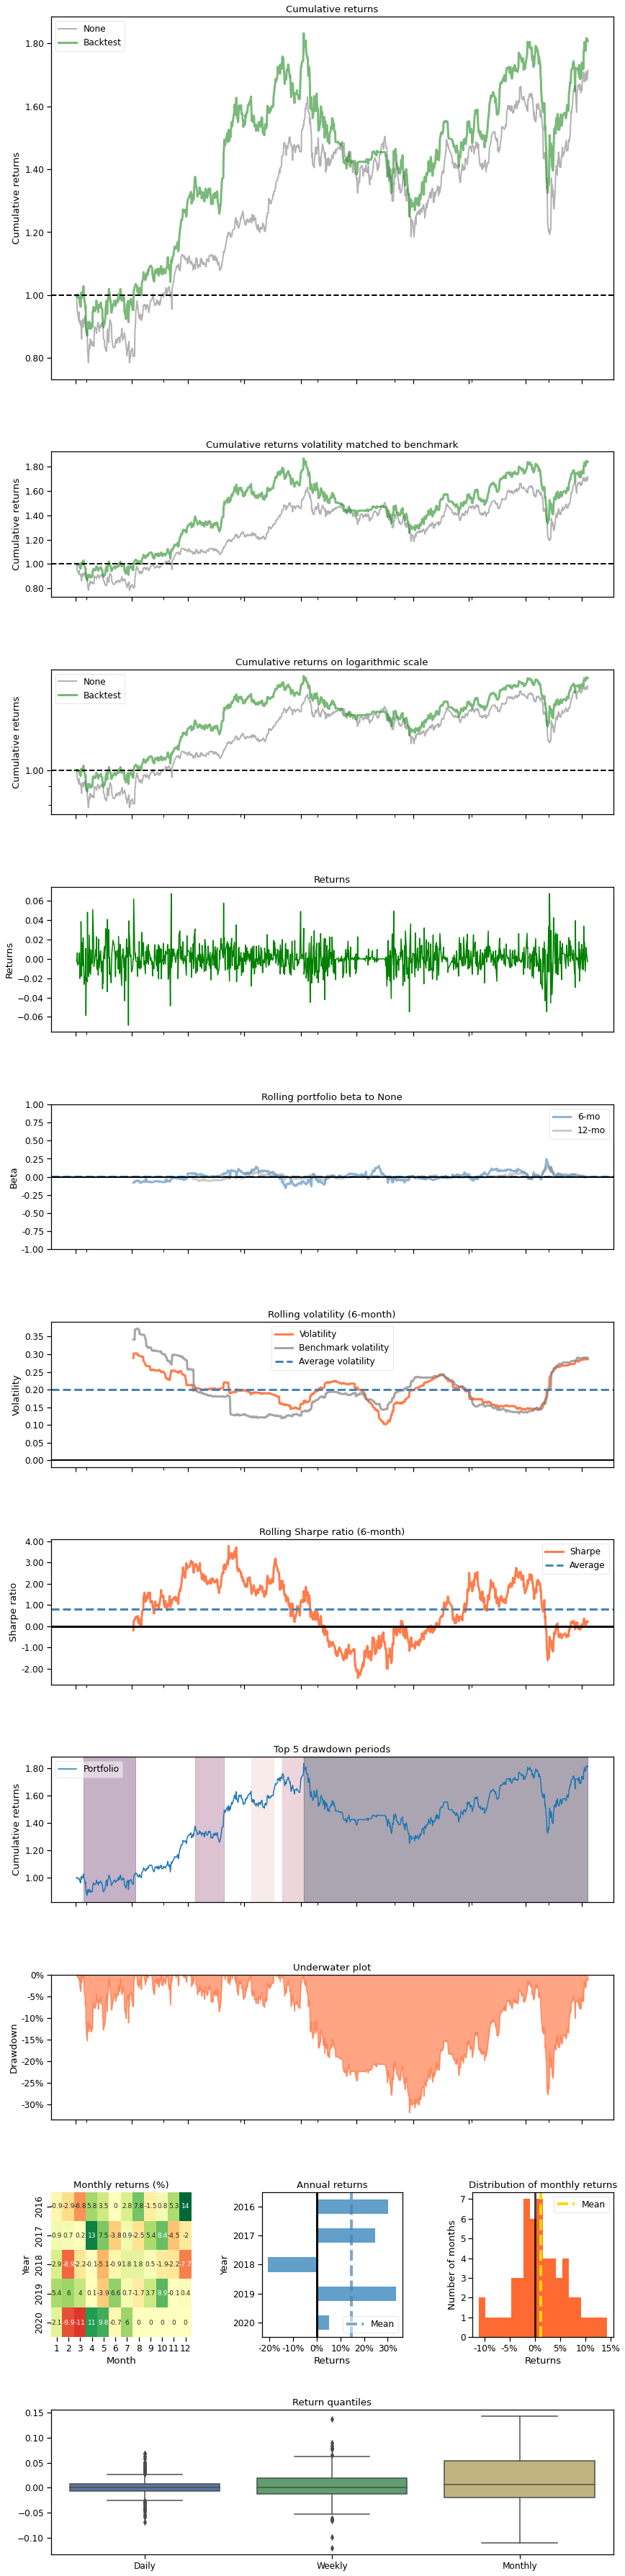

In [19]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = tse_ensemble_5_strat,
                                   benchmark_rets=dow_strat, set_context=False)

In [20]:
term = '(2016/01/04-2020/07/21)'
ensemble_performance_evaluation = {term:['Cumulative Return','Annual Return', 'Annual Volatility','Sharpe Ratio', 'Max Dragdown'],
                          'tse_ensemble_1':['118.221%','18.935%','25.125%','0.81','-31.078%'],
                          'tse_ensemble_2':['53.975%','10.067%','20.362%','0.57','-32.16%'],
                          'tse_ensemble_3':['170.33%','24.732%','20.211%','1.20','-27.055%'],
                          'tse_ensemble_4':['57.128%','10.563%','21.25%','0.58','-31.991%'],
                          'tse_ensemble_5':['80.751%','14.059%','21.31%','0.72','-31.822%'],
                          }
ensemble_performance_evaluation = pd.DataFrame(ensemble_performance_evaluation).set_index(term)
ensemble_performance_evaluation.to_csv('performance/tse_ensemble_performance_evaluation_comparison.csv',index=True)
display(ensemble_performance_evaluation)

tse_ensemble_1 tse_ensemble_2 tse_ensemble_3  \
(2016/01/04-2020/07/21)                                                
Cumulative Return             118.221%        53.975%        170.33%   
Annual Return                  18.935%        10.067%        24.732%   
Annual Volatility              25.125%        20.362%        20.211%   
Sharpe Ratio                      0.81           0.57           1.20   
Max Dragdown                  -31.078%        -32.16%       -27.055%   

                        tse_ensemble_4 tse_ensemble_5  
(2016/01/04-2020/07/21)                                
Cumulative Return              57.128%        80.751%  
Annual Return                  10.563%        14.059%  
Annual Volatility               21.25%         21.31%  
Sharpe Ratio                      0.58           0.72  
Max Dragdown                  -31.991%       -31.822%

In [21]:
ensemble_performance_evaluation_transpose = ensemble_performance_evaluation.T
ensemble_performance_evaluation_transpose.apply(lambda x: x.replace("%","",regex=True,inplace=True)) # 부분일치의 경우, regex=True 파라미터를 추가함으로써 해당 문자가 포함되어 있으면 문자가 대체된다.
ensemble_performance_evaluation_transpose = ensemble_performance_evaluation_transpose.apply(pd.to_numeric)
display(ensemble_performance_evaluation_transpose)
display(ensemble_performance_evaluation_transpose.dtypes)

(2016/01/04-2020/07/21)  Cumulative Return  Annual Return  Annual Volatility  \
tse_ensemble_1                     118.221         18.935             25.125   
tse_ensemble_2                      53.975         10.067             20.362   
tse_ensemble_3                     170.330         24.732             20.211   
tse_ensemble_4                      57.128         10.563             21.250   
tse_ensemble_5                      80.751         14.059             21.310   

(2016/01/04-2020/07/21)  Sharpe Ratio  Max Dragdown  
tse_ensemble_1                   0.81       -31.078  
tse_ensemble_2                   0.57       -32.160  
tse_ensemble_3                   1.20       -27.055  
tse_ensemble_4                   0.58       -31.991  
tse_ensemble_5                   0.72       -31.822

(2016/01/04-2020/07/21)
Cumulative Return    float64
Annual Return        float64
Annual Volatility    float64
Sharpe Ratio         float64
Max Dragdown         float64
dtype: object

In [22]:
ensemble_performance_evaluation_transpose['Cumulative Return'].mean()
#ensemble_performance_evaluation_transpose['Annual Return'].mean()
#ensemble_performance_evaluation_transpose['Annual Volatility'].mean()
#ensemble_performance_evaluation_transpose['Sharpe Ratio'].mean()
#ensemble_performance_evaluation_transpose['Max Dragdown'].mean()

96.08099999999999

## PPO

In [23]:
tse_ppo_1_account_value = get_account_value(63, 63, 'tse', 'ppo', 'PPO', 1)
tse_ppo_2_account_value = get_account_value(63, 63, 'tse', 'ppo', 'PPO', 2)
tse_ppo_3_account_value = get_account_value(63, 63, 'tse', 'ppo', 'PPO', 3)
tse_ppo_4_account_value = get_account_value(63, 63, 'tse', 'ppo', 'PPO', 4)
tse_ppo_5_account_value = get_account_value(63, 63, 'tse', 'ppo', 'PPO', 5)
display(tse_ppo_1_account_value)

account_value  datadate
0      1.000000e+08  20160104
1      9.999515e+07  20160105
2      9.965151e+07  20160106
3      1.001193e+08  20160107
4      9.956888e+07  20160108
...             ...       ...
1129   1.412030e+08  20200715
1130   1.427613e+08  20200716
1131   1.417544e+08  20200717
1132   1.417685e+08  20200720
1133   1.421744e+08  20200721

[1134 rows x 2 columns]

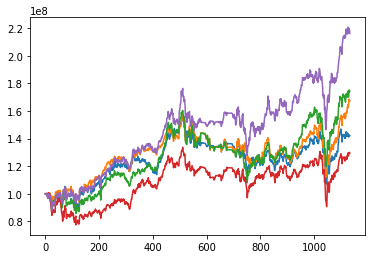

In [24]:
tse_ppo_1_account_value.account_value.plot()
tse_ppo_2_account_value.account_value.plot()
tse_ppo_3_account_value.account_value.plot()
tse_ppo_4_account_value.account_value.plot()
tse_ppo_5_account_value.account_value.plot()

In [25]:
tse_ppo_1_account_value = get_daily_return(tse_ppo_1_account_value)
tse_ppo_2_account_value = get_daily_return(tse_ppo_2_account_value)
tse_ppo_3_account_value = get_daily_return(tse_ppo_3_account_value)
tse_ppo_4_account_value = get_daily_return(tse_ppo_4_account_value)
tse_ppo_5_account_value = get_daily_return(tse_ppo_5_account_value)

In [26]:
tse_ppo_1_account_value['Date'] = test_tse['Date']
tse_ppo_2_account_value['Date'] = test_tse['Date']
tse_ppo_3_account_value['Date'] = test_tse['Date']
tse_ppo_4_account_value['Date'] = test_tse['Date']
tse_ppo_5_account_value['Date'] = test_tse['Date']
#display(tse_ppo_1_account_value)

In [27]:
tse_ppo_1_strat = backtest_strat(tse_ppo_1_account_value)
tse_ppo_2_strat = backtest_strat(tse_ppo_2_account_value)
tse_ppo_3_strat = backtest_strat(tse_ppo_3_account_value)
tse_ppo_4_strat = backtest_strat(tse_ppo_4_account_value)
tse_ppo_5_strat = backtest_strat(tse_ppo_5_account_value)
#display(pd.DataFrame(tse_ppo_1_strat))

/home/kongminseok/anaconda3/envs/k/lib/python3.7/site-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


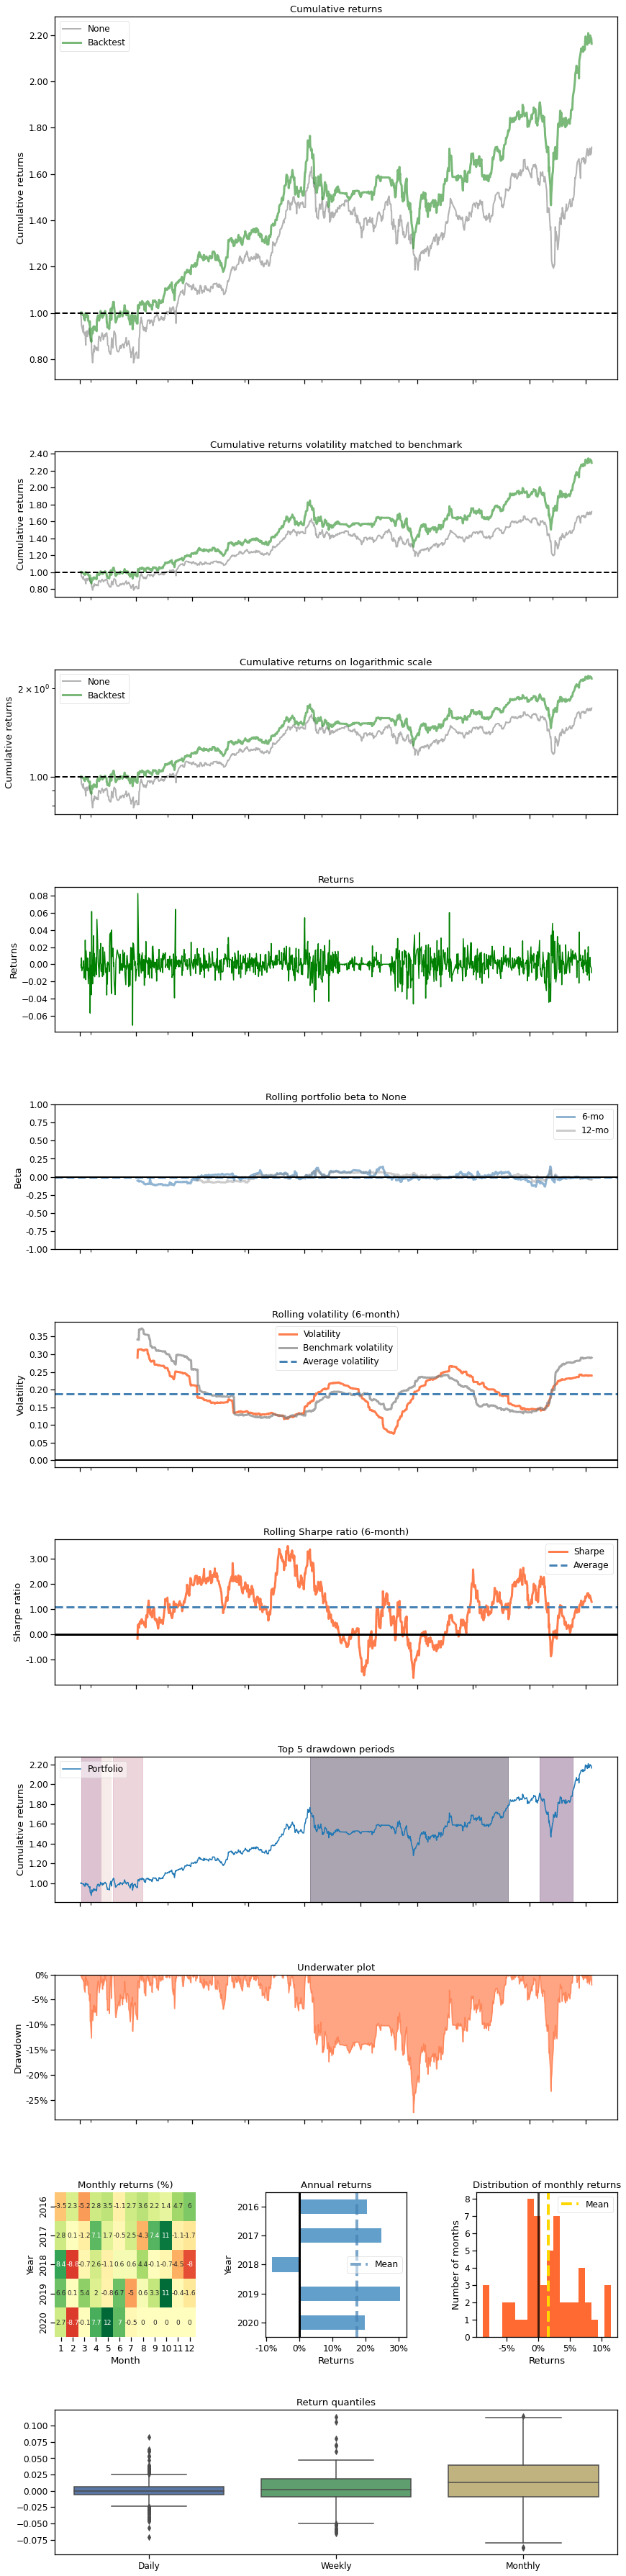

In [28]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = tse_ppo_5_strat,
                                   benchmark_rets=dow_strat, set_context=False)

In [29]:
term = '(2016/01/04-2020/07/21)'
ppo_performance_evaluation = {term:['Cumulative Return','Annual Return', 'Annual Volatility','Sharpe Ratio', 'Max Dragdown'],
                          'tse_ppo_1':['42.174%','8.134%','19.886%','0.49','-31.372%'],
                          'tse_ppo_2':['67.524%','12.149%','19.311%','0.69','-28.981%'],
                          'tse_ppo_3':['74.164%','13.122%','20.998%','0.69','-32.659%'],
                          'tse_ppo_4':['29.358%','5.887%','21.276%','0.38','-32.151%'],
                          'tse_ppo_5':['116.246%','18.695%','20.248%','0.95','-27.516%'],
                          }
ppo_performance_evaluation = pd.DataFrame(ppo_performance_evaluation).set_index(term)
ppo_performance_evaluation.to_csv('performance/tse_ppo_performance_evaluation_comparison.csv',index=True)
display(ppo_performance_evaluation)

tse_ppo_1 tse_ppo_2 tse_ppo_3 tse_ppo_4 tse_ppo_5
(2016/01/04-2020/07/21)                                                  
Cumulative Return         42.174%   67.524%   74.164%   29.358%  116.246%
Annual Return              8.134%   12.149%   13.122%    5.887%   18.695%
Annual Volatility         19.886%   19.311%   20.998%   21.276%   20.248%
Sharpe Ratio                 0.49      0.69      0.69      0.38      0.95
Max Dragdown             -31.372%  -28.981%  -32.659%  -32.151%  -27.516%

In [30]:
ppo_performance_evaluation_transpose = ppo_performance_evaluation.T
ppo_performance_evaluation_transpose.apply(lambda x: x.replace("%","",regex=True,inplace=True)) # 부분일치의 경우, regex=True 파라미터를 추가함으로써 해당 문자가 포함되어 있으면 문자가 대체된다.
ppo_performance_evaluation_transpose = ppo_performance_evaluation_transpose.apply(pd.to_numeric)
display(ppo_performance_evaluation_transpose)
display(ppo_performance_evaluation_transpose.dtypes)

(2016/01/04-2020/07/21)  Cumulative Return  Annual Return  Annual Volatility  \
tse_ppo_1                           42.174          8.134             19.886   
tse_ppo_2                           67.524         12.149             19.311   
tse_ppo_3                           74.164         13.122             20.998   
tse_ppo_4                           29.358          5.887             21.276   
tse_ppo_5                          116.246         18.695             20.248   

(2016/01/04-2020/07/21)  Sharpe Ratio  Max Dragdown  
tse_ppo_1                        0.49       -31.372  
tse_ppo_2                        0.69       -28.981  
tse_ppo_3                        0.69       -32.659  
tse_ppo_4                        0.38       -32.151  
tse_ppo_5                        0.95       -27.516

(2016/01/04-2020/07/21)
Cumulative Return    float64
Annual Return        float64
Annual Volatility    float64
Sharpe Ratio         float64
Max Dragdown         float64
dtype: object

In [31]:
ppo_performance_evaluation_transpose['Cumulative Return'].mean()
#ensemble_performance_evaluation_transpose['Annual Return'].mean()
#ensemble_performance_evaluation_transpose['Annual Volatility'].mean()
#ensemble_performance_evaluation_transpose['Sharpe Ratio'].mean()
#ensemble_performance_evaluation_transpose['Max Dragdown'].mean()

65.89320000000001

## A2C

In [32]:
tse_a2c_1_account_value = get_account_value(63, 63, 'tse', 'a2c', 'A2C', 1)
tse_a2c_2_account_value = get_account_value(63, 63, 'tse', 'a2c', 'A2C', 2)
tse_a2c_3_account_value = get_account_value(63, 63, 'tse', 'a2c', 'A2C', 3)
tse_a2c_4_account_value = get_account_value(63, 63, 'tse', 'a2c', 'A2C', 4)
tse_a2c_5_account_value = get_account_value(63, 63, 'tse', 'a2c', 'A2C', 5)
display(tse_a2c_1_account_value)

account_value  datadate
0      1.000000e+08  20160104
1      9.991361e+07  20160105
2      9.966500e+07  20160106
3      9.997663e+07  20160107
4      9.957966e+07  20160108
...             ...       ...
1129   1.439905e+08  20200715
1130   1.466101e+08  20200716
1131   1.482601e+08  20200717
1132   1.480953e+08  20200720
1133   1.484151e+08  20200721

[1134 rows x 2 columns]

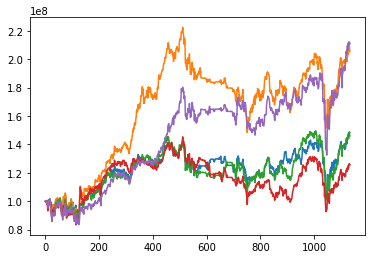

In [33]:
tse_a2c_1_account_value.account_value.plot()
tse_a2c_2_account_value.account_value.plot()
tse_a2c_3_account_value.account_value.plot()
tse_a2c_4_account_value.account_value.plot()
tse_a2c_5_account_value.account_value.plot()

In [34]:
tse_a2c_1_account_value = get_daily_return(tse_a2c_1_account_value)
tse_a2c_2_account_value = get_daily_return(tse_a2c_2_account_value)
tse_a2c_3_account_value = get_daily_return(tse_a2c_3_account_value)
tse_a2c_4_account_value = get_daily_return(tse_a2c_4_account_value)
tse_a2c_5_account_value = get_daily_return(tse_a2c_5_account_value)

In [35]:
tse_a2c_1_account_value['Date'] = test_tse['Date']
tse_a2c_2_account_value['Date'] = test_tse['Date']
tse_a2c_3_account_value['Date'] = test_tse['Date']
tse_a2c_4_account_value['Date'] = test_tse['Date']
tse_a2c_5_account_value['Date'] = test_tse['Date']
#display(tse_a2c_1_account_value)

In [36]:
tse_a2c_1_strat = backtest_strat(tse_a2c_1_account_value)
tse_a2c_2_strat = backtest_strat(tse_a2c_2_account_value)
tse_a2c_3_strat = backtest_strat(tse_a2c_3_account_value)
tse_a2c_4_strat = backtest_strat(tse_a2c_4_account_value)
tse_a2c_5_strat = backtest_strat(tse_a2c_5_account_value)
#display(pd.DataFrame(tse_a2c_1_strat))

/home/kongminseok/anaconda3/envs/k/lib/python3.7/site-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


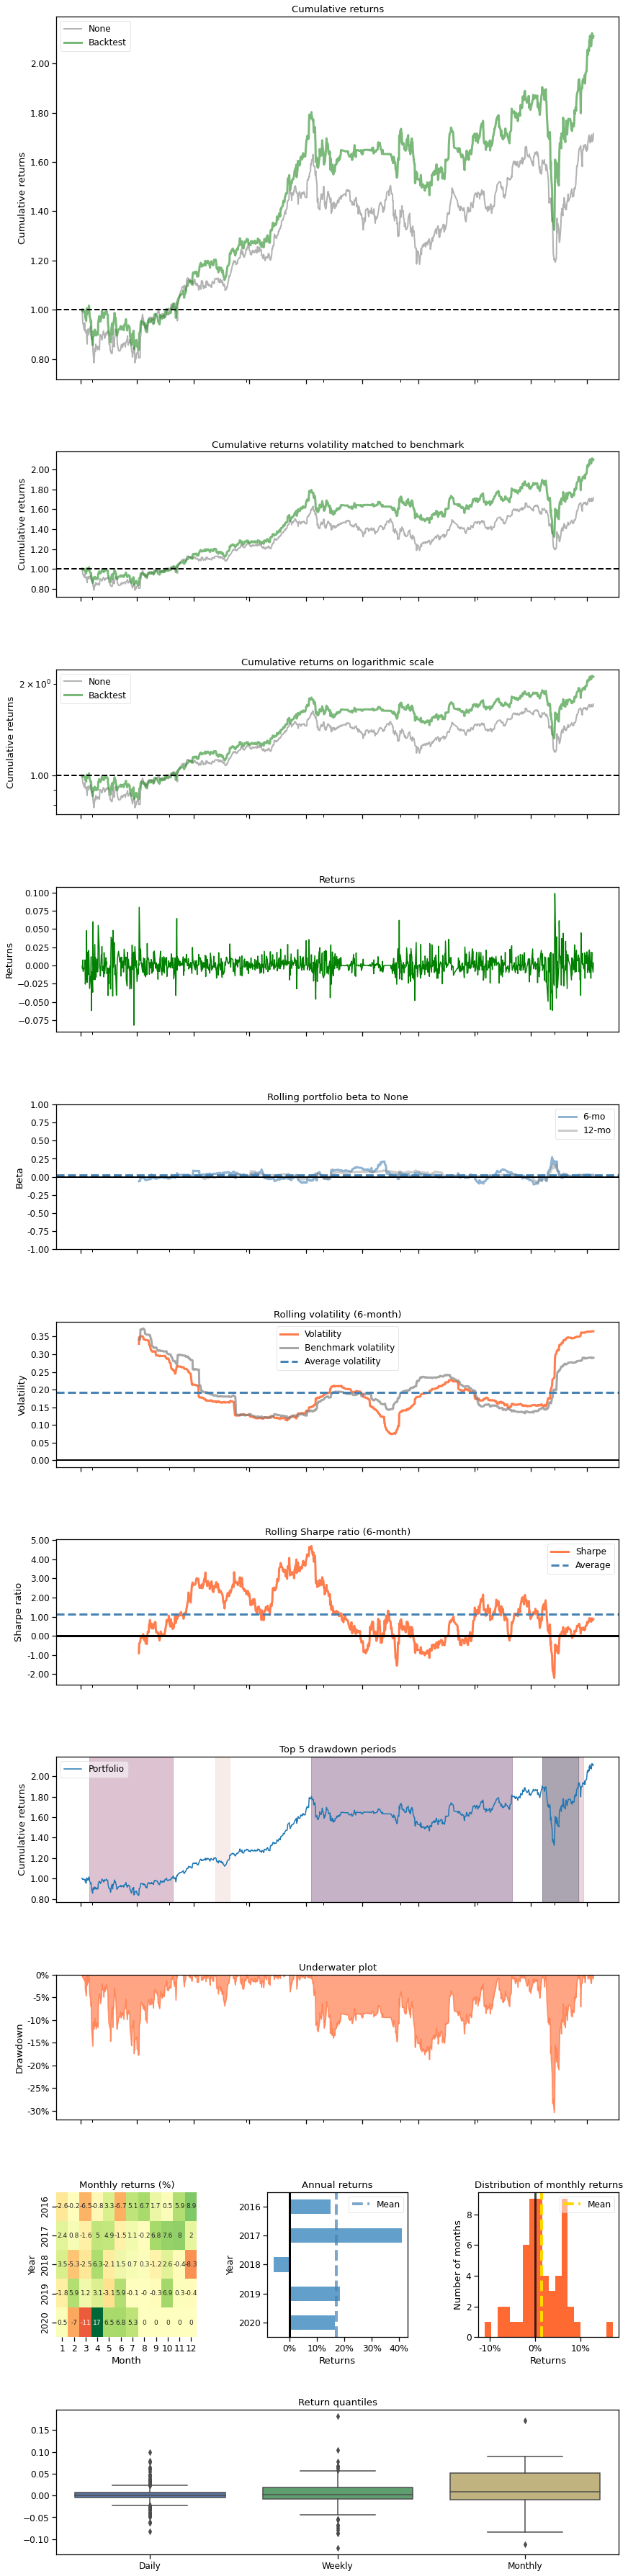

In [37]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = tse_a2c_5_strat,
                                   benchmark_rets=dow_strat, set_context=False)

In [38]:
a2c_performance_evaluation = {term:['Cumulative Return','Annual Return', 'Annual Volatility','Sharpe Ratio', 'Max Dragdown'],
                          'tse_a2c_1':['48.415%','9.171%','21.16%','0.52','-28.213%'],
                          'tse_a2c_2':['105.454%','17.352%','21.198%','0.86','-33.268%'],
                          'tse_a2c_3':['45.949%','8.765%','21.809%','0.49','-32.582%'],
                          'tse_a2c_4':['25.736%','5.221%','22.7%','0.34','-36.263%'],
                          'tse_a2c_5':['111.088%','18.06%','22.181%','0.86','-30.437%'],
                          }
a2c_performance_evaluation = pd.DataFrame(a2c_performance_evaluation).set_index(term)
a2c_performance_evaluation.to_csv('performance/tse_a2c_performance_evaluation_comparison.csv',index=True)
display(a2c_performance_evaluation)

tse_a2c_1 tse_a2c_2 tse_a2c_3 tse_a2c_4 tse_a2c_5
(2016/01/04-2020/07/21)                                                  
Cumulative Return         48.415%  105.454%   45.949%   25.736%  111.088%
Annual Return              9.171%   17.352%    8.765%    5.221%    18.06%
Annual Volatility          21.16%   21.198%   21.809%     22.7%   22.181%
Sharpe Ratio                 0.52      0.86      0.49      0.34      0.86
Max Dragdown             -28.213%  -33.268%  -32.582%  -36.263%  -30.437%

In [39]:
a2c_performance_evaluation_transpose = a2c_performance_evaluation.T
a2c_performance_evaluation_transpose.apply(lambda x: x.replace("%","",regex=True,inplace=True)) # 부분일치의 경우, regex=True 파라미터를 추가함으로써 해당 문자가 포함되어 있으면 문자가 대체된다.
a2c_performance_evaluation_transpose = a2c_performance_evaluation_transpose.apply(pd.to_numeric)
display(a2c_performance_evaluation_transpose)
display(a2c_performance_evaluation_transpose.dtypes)

(2016/01/04-2020/07/21)  Cumulative Return  Annual Return  Annual Volatility  \
tse_a2c_1                           48.415          9.171             21.160   
tse_a2c_2                          105.454         17.352             21.198   
tse_a2c_3                           45.949          8.765             21.809   
tse_a2c_4                           25.736          5.221             22.700   
tse_a2c_5                          111.088         18.060             22.181   

(2016/01/04-2020/07/21)  Sharpe Ratio  Max Dragdown  
tse_a2c_1                        0.52       -28.213  
tse_a2c_2                        0.86       -33.268  
tse_a2c_3                        0.49       -32.582  
tse_a2c_4                        0.34       -36.263  
tse_a2c_5                        0.86       -30.437

(2016/01/04-2020/07/21)
Cumulative Return    float64
Annual Return        float64
Annual Volatility    float64
Sharpe Ratio         float64
Max Dragdown         float64
dtype: object

In [40]:
a2c_performance_evaluation_transpose['Cumulative Return'].mean()
#a2c_performance_evaluation_transpose['Annual Return'].mean()
#a2c_performance_evaluation_transpose['Annual Volatility'].mean()
#a2c_performance_evaluation_transpose['Sharpe Ratio'].mean()
#a2c_performance_evaluation_transpose['Max Dragdown'].mean()

67.32839999999999

## DDPG

In [41]:
tse_ddpg_1_account_value = get_account_value(63, 63, 'tse', 'ddpg', 'ddpg', 1)
tse_ddpg_2_account_value = get_account_value(63, 63, 'tse', 'ddpg', 'ddpg', 2)
tse_ddpg_3_account_value = get_account_value(63, 63, 'tse', 'ddpg', 'ddpg', 3)
tse_ddpg_4_account_value = get_account_value(63, 63, 'tse', 'ddpg', 'ddpg', 4)
tse_ddpg_5_account_value = get_account_value(63, 63, 'tse', 'ddpg', 'ddpg', 5)
display(tse_ddpg_1_account_value)

account_value  datadate
0      1.000000e+08  20160104
1      9.989229e+07  20160105
2      9.946428e+07  20160106
3      1.002356e+08  20160107
4      9.931184e+07  20160108
...             ...       ...
1129   2.072329e+08  20200715
1130   2.121877e+08  20200716
1131   2.118083e+08  20200717
1132   2.105330e+08  20200720
1133   2.103172e+08  20200721

[1134 rows x 2 columns]

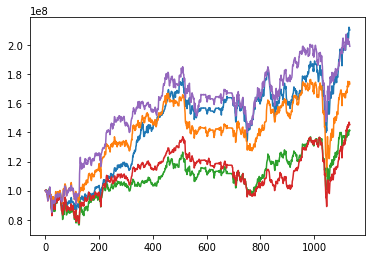

In [42]:
tse_ddpg_1_account_value.account_value.plot()
tse_ddpg_2_account_value.account_value.plot()
tse_ddpg_3_account_value.account_value.plot()
tse_ddpg_4_account_value.account_value.plot()
tse_ddpg_5_account_value.account_value.plot()

In [43]:
tse_ddpg_1_account_value = get_daily_return(tse_ddpg_1_account_value)
tse_ddpg_2_account_value = get_daily_return(tse_ddpg_2_account_value)
tse_ddpg_3_account_value = get_daily_return(tse_ddpg_3_account_value)
tse_ddpg_4_account_value = get_daily_return(tse_ddpg_4_account_value)
tse_ddpg_5_account_value = get_daily_return(tse_ddpg_5_account_value)

In [44]:
tse_ddpg_1_account_value['Date'] = test_tse['Date']
tse_ddpg_2_account_value['Date'] = test_tse['Date']
tse_ddpg_3_account_value['Date'] = test_tse['Date']
tse_ddpg_4_account_value['Date'] = test_tse['Date']
tse_ddpg_5_account_value['Date'] = test_tse['Date']
#display(tse_ensemble_1_account_value)

In [45]:
tse_ddpg_1_strat = backtest_strat(tse_ddpg_1_account_value)
tse_ddpg_2_strat = backtest_strat(tse_ddpg_2_account_value)
tse_ddpg_3_strat = backtest_strat(tse_ddpg_3_account_value)
tse_ddpg_4_strat = backtest_strat(tse_ddpg_4_account_value)
tse_ddpg_5_strat = backtest_strat(tse_ddpg_5_account_value)
#display(pd.DataFrame(tse_ddpg_1_strat))

/home/kongminseok/anaconda3/envs/k/lib/python3.7/site-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


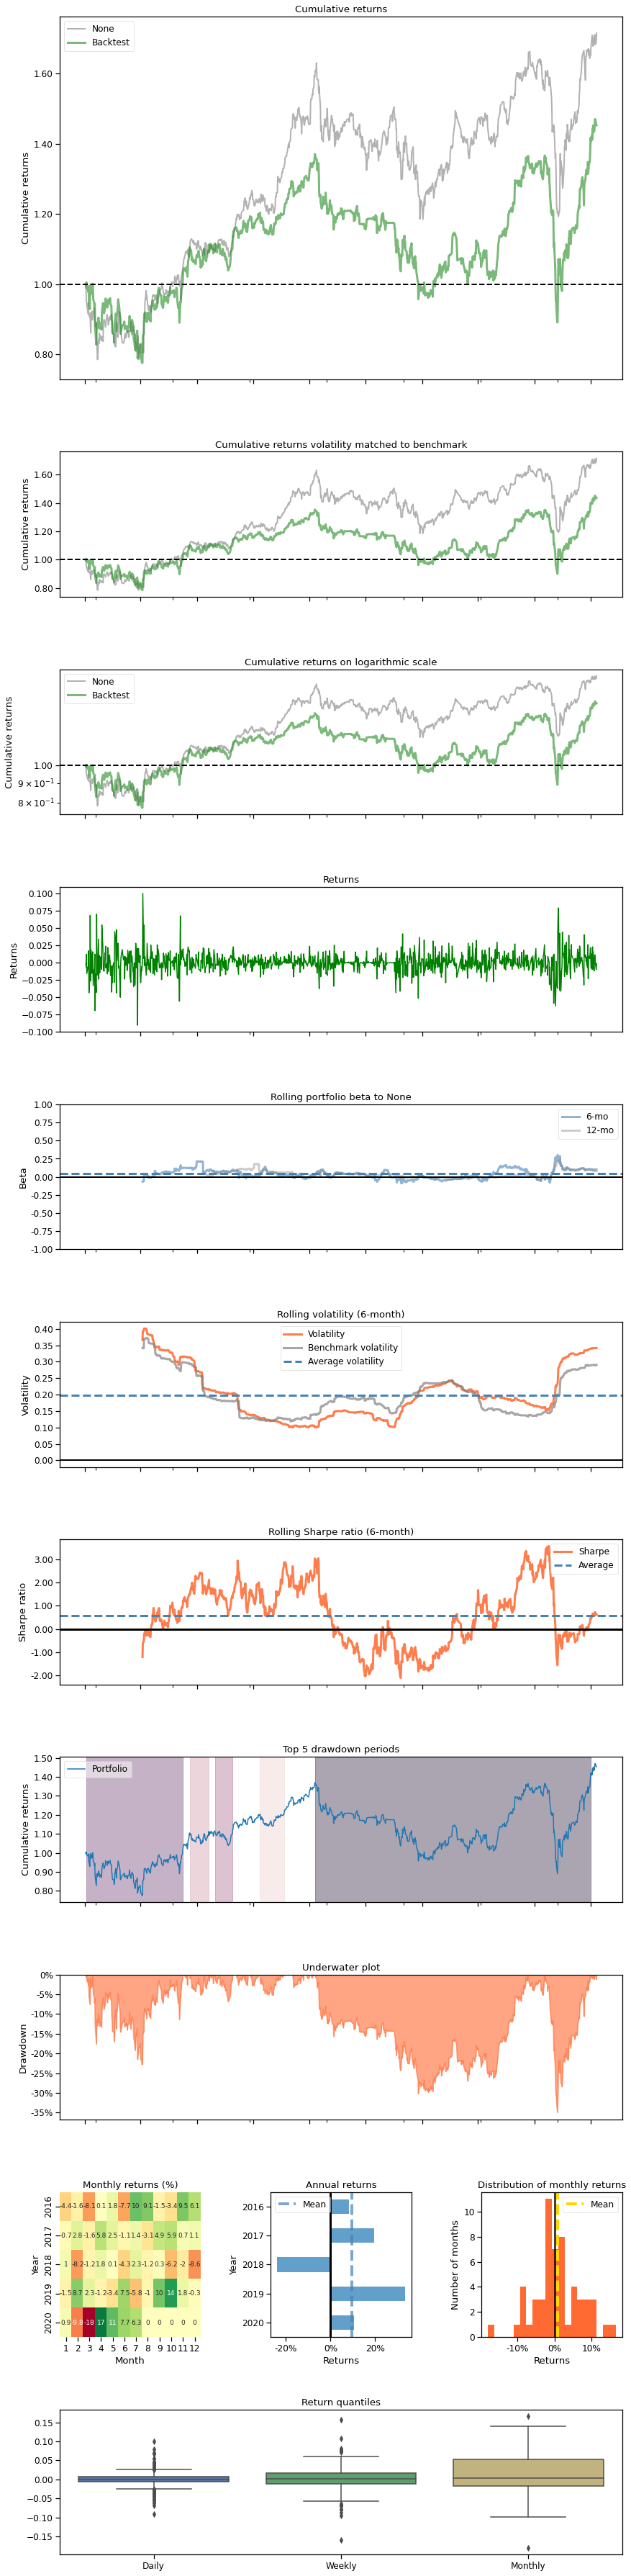

In [46]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = tse_ddpg_4_strat,
                                   benchmark_rets=dow_strat, set_context=False)

In [47]:
ddpg_performance_evaluation = {term:['Cumulative Return','Annual Return', 'Annual Volatility','Sharpe Ratio', 'Max Dragdown'],
                          'tse_ddpg_1':['110.317%','17.964%','21.863%','0.87','-26.01%'],
                          'tse_ddpg_2':['73.303%','12.997%','23.271%','0.64','-37.732%'],
                          'tse_ddpg_3':['41.253%','7.977%','23.05%','0.45','-26.365%'],
                          'tse_ddpg_4':['45.285%','8.655%','23.136%','0.47','-35.013%'],
                          'tse_ddpg_5':['99.117%','16.538%','22.187%','0.80','-26.456%']
                          }
ddpg_performance_evaluation = pd.DataFrame(ddpg_performance_evaluation).set_index(term)
ddpg_performance_evaluation.to_csv('performance/tse_ddpg_performance_evaluation_comparison.csv',index=True)
display(ddpg_performance_evaluation)

tse_ddpg_1 tse_ddpg_2 tse_ddpg_3 tse_ddpg_4 tse_ddpg_5
(2016/01/04-2020/07/21)                                                       
Cumulative Return         110.317%    73.303%    41.253%    45.285%    99.117%
Annual Return              17.964%    12.997%     7.977%     8.655%    16.538%
Annual Volatility          21.863%    23.271%     23.05%    23.136%    22.187%
Sharpe Ratio                  0.87       0.64       0.45       0.47       0.80
Max Dragdown               -26.01%   -37.732%   -26.365%   -35.013%   -26.456%

In [48]:
ddpg_performance_evaluation_transpose = ddpg_performance_evaluation.T
ddpg_performance_evaluation_transpose.apply(lambda x: x.replace("%","",regex=True,inplace=True)) # 부분일치의 경우, regex=True 파라미터를 추가함으로써 해당 문자가 포함되어 있으면 문자가 대체된다.
ddpg_performance_evaluation_transpose = ddpg_performance_evaluation_transpose.apply(pd.to_numeric)
display(ddpg_performance_evaluation_transpose)
display(ddpg_performance_evaluation_transpose.dtypes)

(2016/01/04-2020/07/21)  Cumulative Return  Annual Return  Annual Volatility  \
tse_ddpg_1                         110.317         17.964             21.863   
tse_ddpg_2                          73.303         12.997             23.271   
tse_ddpg_3                          41.253          7.977             23.050   
tse_ddpg_4                          45.285          8.655             23.136   
tse_ddpg_5                          99.117         16.538             22.187   

(2016/01/04-2020/07/21)  Sharpe Ratio  Max Dragdown  
tse_ddpg_1                       0.87       -26.010  
tse_ddpg_2                       0.64       -37.732  
tse_ddpg_3                       0.45       -26.365  
tse_ddpg_4                       0.47       -35.013  
tse_ddpg_5                       0.80       -26.456

(2016/01/04-2020/07/21)
Cumulative Return    float64
Annual Return        float64
Annual Volatility    float64
Sharpe Ratio         float64
Max Dragdown         float64
dtype: object

In [49]:
ddpg_performance_evaluation_transpose['Cumulative Return'].mean()
#ddpg_performance_evaluation_transpose['Annual Return'].mean()
#ddpg_performance_evaluation_transpose['Annual Volatility'].mean()
#ddpg_performance_evaluation_transpose['Sharpe Ratio'].mean()
#ddpg_performance_evaluation_transpose['Max Dragdown'].mean()

73.855

## Remake Ensemble

In [50]:
tse_remakeEnsemble_1_account_value = get_account_value(63, 63, 'tse', 'remakeEnsemble', 'remake_ensemble', 1)
tse_remakeEnsemble_2_account_value = get_account_value(63, 63, 'tse', 'remakeEnsemble', 'remake_ensemble', 2)
tse_remakeEnsemble_3_account_value = get_account_value(63, 63, 'tse', 'remakeEnsemble', 'remake_ensemble', 3)
tse_remakeEnsemble_4_account_value = get_account_value(63, 63, 'tse', 'remakeEnsemble', 'remake_ensemble', 4)
tse_remakeEnsemble_5_account_value = get_account_value(63, 63, 'tse', 'remakeEnsemble', 'remake_ensemble', 5)
display(tse_remakeEnsemble_1_account_value)

account_value  datadate
0      1.000000e+08  20160104
1      9.999318e+07  20160105
2      9.961849e+07  20160106
3      1.002617e+08  20160107
4      9.933667e+07  20160108
...             ...       ...
1129   1.909812e+08  20200715
1130   1.958090e+08  20200716
1131   1.968493e+08  20200717
1132   1.973710e+08  20200720
1133   1.981190e+08  20200721

[1134 rows x 2 columns]

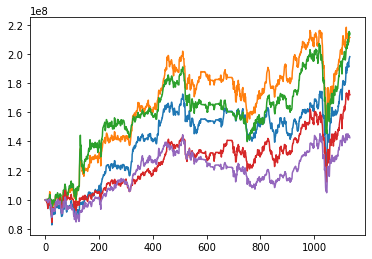

In [51]:
tse_remakeEnsemble_1_account_value.account_value.plot()
tse_remakeEnsemble_2_account_value.account_value.plot()
tse_remakeEnsemble_3_account_value.account_value.plot()
tse_remakeEnsemble_4_account_value.account_value.plot()
tse_remakeEnsemble_5_account_value.account_value.plot()

In [52]:
tse_remakeEnsemble_1_account_value = get_daily_return(tse_remakeEnsemble_1_account_value)
tse_remakeEnsemble_2_account_value = get_daily_return(tse_remakeEnsemble_2_account_value)
tse_remakeEnsemble_3_account_value = get_daily_return(tse_remakeEnsemble_3_account_value)
tse_remakeEnsemble_4_account_value = get_daily_return(tse_remakeEnsemble_4_account_value)
tse_remakeEnsemble_5_account_value = get_daily_return(tse_remakeEnsemble_5_account_value)

In [53]:
tse_remakeEnsemble_1_account_value['Date'] = test_tse['Date']
tse_remakeEnsemble_2_account_value['Date'] = test_tse['Date']
tse_remakeEnsemble_3_account_value['Date'] = test_tse['Date']
tse_remakeEnsemble_4_account_value['Date'] = test_tse['Date']
tse_remakeEnsemble_5_account_value['Date'] = test_tse['Date']
#display(tse_remakeEnsemble_1_account_value)

In [54]:
tse_remakeEnsemble_1_strat = backtest_strat(tse_remakeEnsemble_1_account_value)
tse_remakeEnsemble_2_strat = backtest_strat(tse_remakeEnsemble_2_account_value)
tse_remakeEnsemble_3_strat = backtest_strat(tse_remakeEnsemble_3_account_value)
tse_remakeEnsemble_4_strat = backtest_strat(tse_remakeEnsemble_4_account_value)
tse_remakeEnsemble_5_strat = backtest_strat(tse_remakeEnsemble_5_account_value)
#display(pd.DataFrame(tse_remakeEnsemble_1_strat))

/home/kongminseok/anaconda3/envs/k/lib/python3.7/site-packages/pyfolio/tears.py:907: UserWarning: Passed returns do not overlap with anyinteresting times.
  'interesting times.', UserWarning)


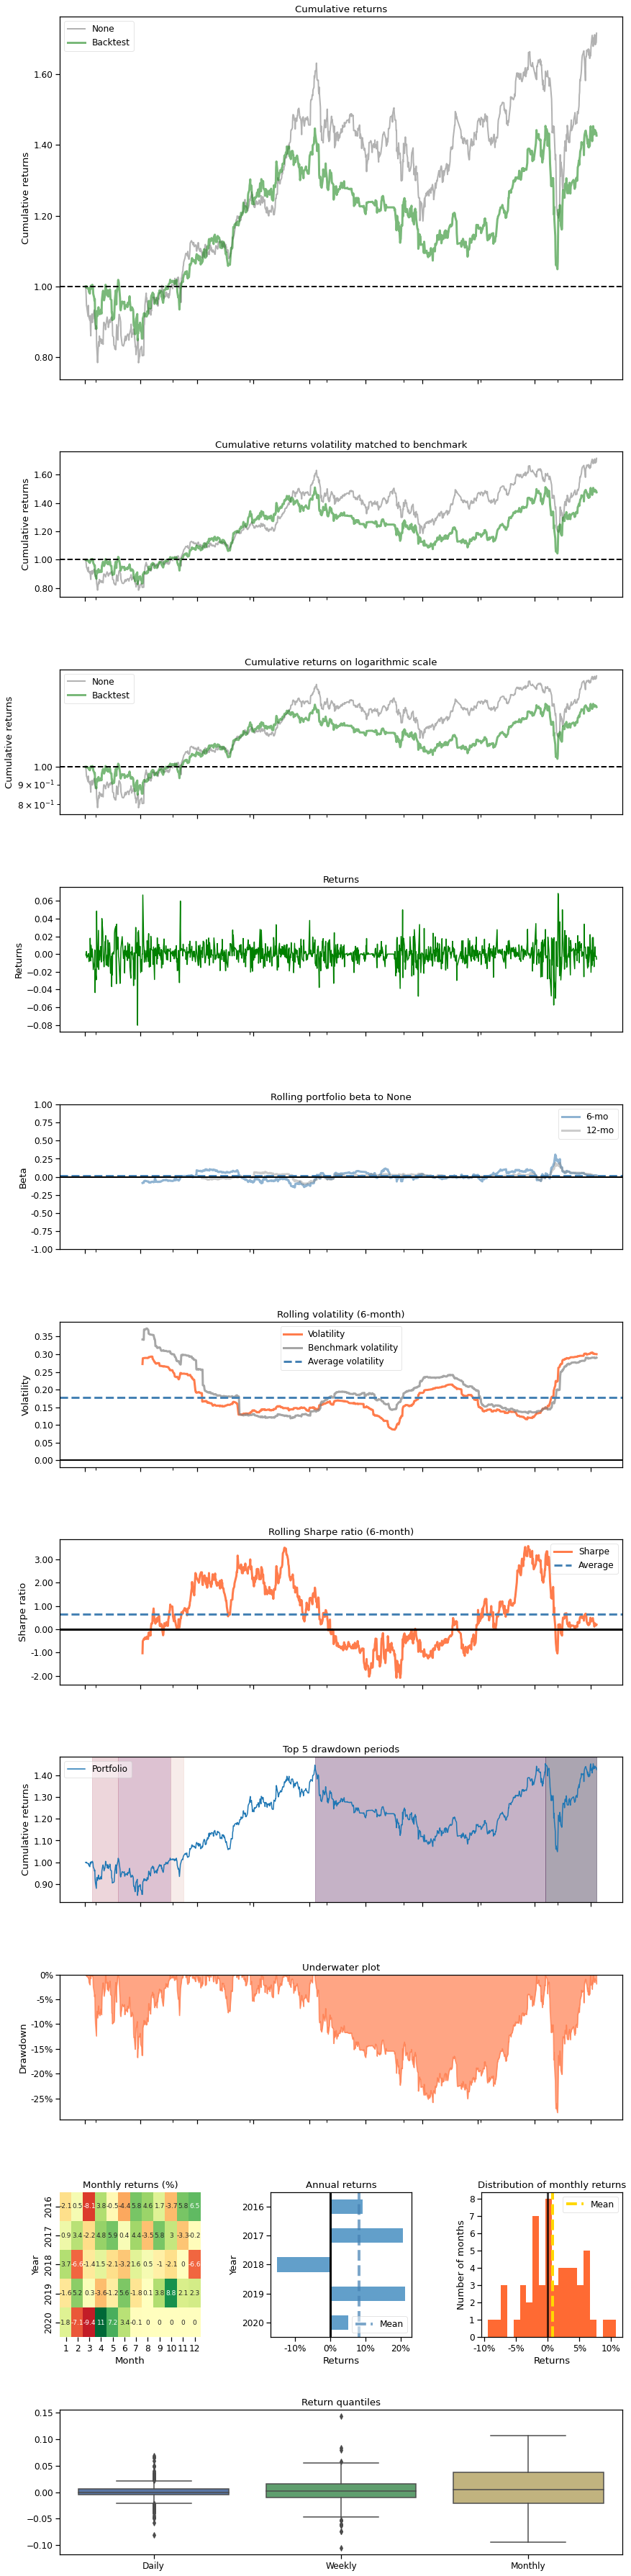

In [55]:
with pyfolio.plotting.plotting_context(font_scale=1.1):
    pyfolio.create_full_tear_sheet(returns = tse_remakeEnsemble_5_strat,
                                   benchmark_rets=dow_strat, set_context=False)

In [56]:
remakeEnsemble_performance_evaluation = {term:['Cumulative Return','Annual Return', 'Annual Volatility','Sharpe Ratio', 'Max Dragdown'],
                          'tse_remakeEnsemble_1':['98.119%','16.408%','21.215%','0.82','-29.258%'],
                          'tse_remakeEnsemble_2':['111.247%','18.08%','22.052%','0.86','-30.277%'],
                          'tse_remakeEnsemble_3':['114.235%','18.449%','22.372%','0.87','-29.863%'],
                          'tse_remakeEnsemble_4':['72.05%','12.815%','21.336%','0.67','-30.717%'],
                          'tse_remakeEnsemble_5':['42.598%','8.205%','19.463%','0.50','-27.842']
                          }
remakeEnsemble_performance_evaluation = pd.DataFrame(remakeEnsemble_performance_evaluation).set_index(term)
remakeEnsemble_performance_evaluation.to_csv('performance/tse_remakeEnsemble_performance_evaluation_comparison.csv',index=True)
display(remakeEnsemble_performance_evaluation)

tse_remakeEnsemble_1 tse_remakeEnsemble_2  \
(2016/01/04-2020/07/21)                                             
Cumulative Return                    98.119%             111.247%   
Annual Return                        16.408%               18.08%   
Annual Volatility                    21.215%              22.052%   
Sharpe Ratio                            0.82                 0.86   
Max Dragdown                        -29.258%             -30.277%   

                        tse_remakeEnsemble_3 tse_remakeEnsemble_4  \
(2016/01/04-2020/07/21)                                             
Cumulative Return                   114.235%               72.05%   
Annual Return                        18.449%              12.815%   
Annual Volatility                    22.372%              21.336%   
Sharpe Ratio                            0.87                 0.67   
Max Dragdown                        -29.863%             -30.717%   

                        tse_remakeEnsemble_5  
(2016/01/04-2020/07/21)                       
Cumulative Return                    42.598%  
Annual Return                         8.205%  
Annual Volatility                    19.463%  
Sharpe Ratio                            0.50  
Max Dragdown                         -27.842

In [57]:
remakeEnsemble_performance_evaluation_transpose = remakeEnsemble_performance_evaluation.T
remakeEnsemble_performance_evaluation_transpose.apply(lambda x: x.replace("%","",regex=True,inplace=True)) # 부분일치의 경우, regex=True 파라미터를 추가함으로써 해당 문자가 포함되어 있으면 문자가 대체된다.
remakeEnsemble_performance_evaluation_transpose = remakeEnsemble_performance_evaluation_transpose.apply(pd.to_numeric)
display(remakeEnsemble_performance_evaluation_transpose)
display(remakeEnsemble_performance_evaluation_transpose.dtypes)

(2016/01/04-2020/07/21)  Cumulative Return  Annual Return  Annual Volatility  \
tse_remakeEnsemble_1                98.119         16.408             21.215   
tse_remakeEnsemble_2               111.247         18.080             22.052   
tse_remakeEnsemble_3               114.235         18.449             22.372   
tse_remakeEnsemble_4                72.050         12.815             21.336   
tse_remakeEnsemble_5                42.598          8.205             19.463   

(2016/01/04-2020/07/21)  Sharpe Ratio  Max Dragdown  
tse_remakeEnsemble_1             0.82       -29.258  
tse_remakeEnsemble_2             0.86       -30.277  
tse_remakeEnsemble_3             0.87       -29.863  
tse_remakeEnsemble_4             0.67       -30.717  
tse_remakeEnsemble_5             0.50       -27.842

(2016/01/04-2020/07/21)
Cumulative Return    float64
Annual Return        float64
Annual Volatility    float64
Sharpe Ratio         float64
Max Dragdown         float64
dtype: object

In [58]:
remakeEnsemble_performance_evaluation_transpose['Cumulative Return'].mean()
#remakeEnsemble_performance_evaluation_transpose['Annual Return'].mean()
#remakeEnsemble_performance_evaluation_transpose['Annual Volatility'].mean()
#remakeEnsemble_performance_evaluation_transpose['Sharpe Ratio'].mean()
#remakeEnsemble_performance_evaluation_transpose['Max Dragdown'].mean()

87.6498

## visualization

In [59]:
df = pd.DataFrame(columns=['data','agent','Cumulative Return'])
agent = ['ensemble','ppo','a2c','ddpg','remakeEnsemble']

performance_evaluation_transpose = [ensemble_performance_evaluation_transpose,
                                   ppo_performance_evaluation_transpose,
                                   a2c_performance_evaluation_transpose,
                                   ddpg_performance_evaluation_transpose,
                                   remakeEnsemble_performance_evaluation_transpose]
                                   

for i in range(5):
    for j in range(5):
        dic = {}
        dic['data']='kospi'
        dic['agent']= agent[i]
        dic['Cumulative Return']= performance_evaluation_transpose[i]['Cumulative Return'][j]
        df = df.append(dic,ignore_index=True)

display(df)

data           agent  Cumulative Return
0   kospi        ensemble            118.221
1   kospi        ensemble             53.975
2   kospi        ensemble            170.330
3   kospi        ensemble             57.128
4   kospi        ensemble             80.751
5   kospi             ppo             42.174
6   kospi             ppo             67.524
7   kospi             ppo             74.164
8   kospi             ppo             29.358
9   kospi             ppo            116.246
10  kospi             a2c             48.415
11  kospi             a2c            105.454
12  kospi             a2c             45.949
13  kospi             a2c             25.736
14  kospi             a2c            111.088
15  kospi            ddpg            110.317
16  kospi            ddpg             73.303
17  kospi            ddpg             41.253
18  kospi            ddpg             45.285
19  kospi            ddpg             99.117
20  kospi  remakeEnsemble             98.119
21  kospi  remakeEnsemble            111.247
22  kospi  remakeEnsemble            114.235
23  kospi  remakeEnsemble             72.050
24  kospi  remakeEnsemble             42.598

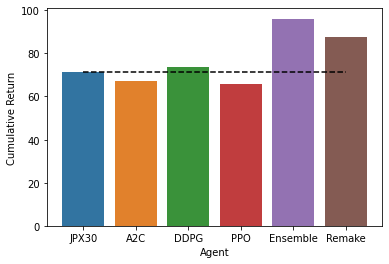

In [62]:
real_tse = 71.51
ensemble_mean = df[df.agent=='ensemble']['Cumulative Return'].mean()
ppo_mean = df[df.agent=='ppo']['Cumulative Return'].mean()
a2c_mean = df[df.agent=='a2c']['Cumulative Return'].mean()
ddpg_mean = df[df.agent=='ddpg']['Cumulative Return'].mean()
remakeEnsemble_mean = df[df.agent=='remakeEnsemble']['Cumulative Return'].mean()
cumulative_return_mean = [real_tse, a2c_mean, ddpg_mean, ppo_mean, ensemble_mean, remakeEnsemble_mean]
agent = ['JPX30','A2C','DDPG','PPO','Ensemble','Remake']
sns.barplot(y=cumulative_return_mean, x=agent )
sns.lineplot(y=real_tse,x=agent,color='black',linestyle='--')
#plt.title('TSE mean of each agent culmulative return')
plt.xlabel('Agent')
plt.ylabel('Cumulative Return')
plt.savefig('./performance/jpx_agent_mean.png',dpi=1000)

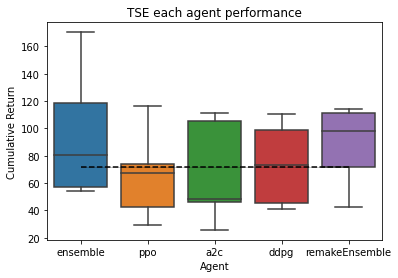

In [104]:
sns.boxplot(y=df['Cumulative Return'], x = df['agent'])
sns.lineplot(y=real_tse,x=df['agent'],color='black',linestyle='--')
plt.title('TSE each agent performance')
plt.xlabel('Agent')
plt.ylabel('Cumulative Return')
plt.savefig('./performance/tse_agent_performance.png',dpi=500)